---
# ⚡ Time-Series Forecasting of Energy Consumption using FLAML
---

## 📋 Project Information

**Course** | MSML610 - Advanced Machine Learning <br>
**Project** | Time-Series Forecasting of Energy Consumption <br>
**Author** | Anisha Katiyar (121082886) <br>
**Semester** | Fall 2025 <br>
**Difficulty** | Level 3 (Hard) 

---

## 🎯 Project Objective

> **Goal:** Forecast household energy consumption using historical usage data. This project focuses on experimenting with multiple forecasting models through FLAML to handle seasonality and optimize accuracy.

### What is FLAML?

**FLAML (Fast and Lightweight AutoML)** is an open-source Python library developed by Microsoft Research designed for automating machine learning tasks efficiently and with minimal resource consumption. 

**Key Features of FLAML:**
- ✅ Efficiently automates the ML pipeline including model selection and hyperparameter tuning
- ✅ Supports classification, regression, and time-series forecasting
- ✅ Lightweight design for easy integration without extensive computational resources
- ✅ Automatically selects from models like LightGBM, XGBoost, Random Forest, and more

### Why FLAML for Energy Forecasting?

Energy consumption data has complex patterns:
1. **Multiple seasonalities** (daily, weekly, yearly)
2. **Trends** (gradual changes over time)
3. **Volatility** (random fluctuations)

FLAML automates the process of finding the best model to capture these patterns, saving significant time compared to manual model selection.

---

## 📊 Dataset Information

**UCI Household Electric Power Consumption Dataset**

| Attribute | Value |
|-----------|-------|
| **Source** | [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption) |
| **Records** | 2,075,259 measurements |
| **Frequency** | 1-minute intervals |
| **Period** | December 2006 - November 2010 (47 months) |
| **Location** | Household in Sceaux, France |

**Dataset Columns:**
- `Date` & `Time`: Timestamp of measurement
- `Global_active_power`: Total active power consumed (kW) ← **Our Target**
- `Global_reactive_power`: Total reactive power (kW)
- `Voltage`: Average voltage (V)
- `Global_intensity`: Average current intensity (A)
- `Sub_metering_1/2/3`: Energy sub-metering (Wh)

### How the Dataset Connects to FLAML

We'll use FLAML to automatically:
1. Select the best regression model for predicting `Global_active_power`
2. Optimize hyperparameters within a time budget
3. Compare against traditional approaches (Prophet, ARIMA)


---

## 🗂️ Notebook Structure

> Section 1: Imports & Configuration<br>

> Section 2: Data Loading & Exploratory Analysis<br>
>> 2.1 Loading the Dataset<br>
>> 2.2 Data Quality Assessment<br>
>> 2.3 Exploratory Data Analysis - Visualizations<br>

> Section 3: Data Preparation<br>
>> 3.1 Resampling & Cleaning<br>
>> 3.2 Visualize Cleaned Data ###<br>

> Section 4: Feature Engineering<br>
>> 4.1 Creating All Features<br>
>> 4.2 Feature Correlation Analysis ###<br>

> Section 5: Train-Test Split<br>
>> 5.1 Splitting the Dataset<br>
>> 5.2 Visualize the Train-Test Split ###<br>
>> 5.3 Prepare Feature Matrices for Modeling ###<br>

> Section 6: Model Training & Comparison<br>
>> 6.1 FLAML AutoML - Training All Candidates<br>
>> 6.2 Prophet - Explicit Seasonality Baseline<br>
>> 6.3 ARIMA - Statistical Baseline ###<br>
>> 6.4 Comprehensive Model Comparison ###<br>

> Section 7: Advanced Analysis (Bonus Features)<br>
>> 7.1 Feature Importance Analysis<br>
>> 7.2 Ensemble Forecasting<br>
>> 7.3 Rolling Forecast Evaluation<br>
>> 7.4 Seasonality & Volatality Analysis ###<br>

> Section 8: Business Impact & Final Summary<br>
>> 8.1 Business Impact Analysis<br>
>> 8.2 SAVE ALL RESULTS ###<br>
>> 8.3 FINAL SUMMARY ###<br>

---

---

# 📦 SECTION 1: IMPORTS & CONFIGURATION

---

## 🎯 What's Happening in This Section?

Before we can analyze data or train models, we need to:
1. **Import libraries** - Load the Python packages we'll use
2. **Set configurations** - Define parameters that control our analysis
3. **Set random seeds** - Ensure reproducibility of results

## 📋 Steps We'll Follow

| Step | Action | Why? |
|------|--------|------|
| 1 | Import data processing libraries (pandas, numpy) | Handle tabular data and numerical operations |
| 2 | Import visualization libraries (matplotlib, seaborn, plotly) | Create charts and graphs |
| 3 | Import ML libraries (sklearn, flaml, prophet) | Train and evaluate models |
| 4 | Import utility functions from utils.py | Reuse code for feature engineering |
| 5 | Set display and plotting configurations | Ensure consistent, readable outputs |
| 6 | Define project configuration dictionary | Centralize all parameters |

---

In [1]:
# =============================================================================
# SECTION 1: IMPORTS & CONFIGURATION
# =============================================================================

# -----------------------------------------------------------------------------
# 1.1 STANDARD LIBRARIES
# -----------------------------------------------------------------------------
# These are Python's built-in or widely-used libraries for basic operations

import pandas as pd          # Data manipulation and analysis
import numpy as np           # Numerical computing
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Statistical visualization
from datetime import datetime    # Date/time handling
import warnings              # Suppress unnecessary warnings
import time                  # Track execution time
import os                    # File system operations
import json                  # Save results as JSON

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# -----------------------------------------------------------------------------
# 1.2 MACHINE LEARNING LIBRARIES
# -----------------------------------------------------------------------------
# These libraries provide ML algorithms and evaluation metrics

from sklearn.metrics import (
    mean_squared_error,           # RMSE calculation
    mean_absolute_error,          # MAE calculation
    mean_absolute_percentage_error,  # MAPE calculation
    r2_score                      # R² coefficient
)

# FLAML - Microsoft's Fast and Lightweight AutoML
# This is the CORE library for this project
from flaml import AutoML

# Prophet - Facebook's time series forecasting library
# We use this as a baseline comparison
from prophet import Prophet

# -----------------------------------------------------------------------------
# 1.3 STATISTICAL LIBRARIES
# -----------------------------------------------------------------------------
# For traditional time series analysis

from statsmodels.tsa.arima.model import ARIMA  # ARIMA model
from statsmodels.tsa.stattools import adfuller  # Stationarity test

# -----------------------------------------------------------------------------
# 1.4 UTILITY LIBRARIES
# -----------------------------------------------------------------------------

from tqdm.notebook import tqdm  # Progress bars for loops

# -----------------------------------------------------------------------------
# 1.5 CUSTOM UTILITY FUNCTIONS (from utils.py)
# -----------------------------------------------------------------------------
# These functions are defined in utils.py for code reusability
# They handle common operations like feature engineering and metrics

from utils import (
    add_temporal_features,       # Add day, month, year features
    add_lag_features,            # Add historical value lags
    add_rolling_features,        # Add rolling statistics
    add_ema_features,            # Add exponential moving averages
    calculate_metrics,           # Calculate RMSE, MAE, MAPE, R²
    create_ensemble_predictions  # Combine predictions from multiple models
)

# -----------------------------------------------------------------------------
# 1.6 VISUALIZATION SETTINGS
# -----------------------------------------------------------------------------
# Configure matplotlib for consistent, publication-quality plots

plt.rcParams.update({
    'figure.figsize': (14, 6),   # Default figure size
    'font.size': 10,             # Base font size
    'axes.titlesize': 12,        # Title font size
    'axes.labelsize': 10,        # Axis label font size
    'axes.grid': True,           # Show grid by default
    'grid.alpha': 0.3            # Grid transparency
})

# Use seaborn's whitegrid style for clean plots
sns.set_style("whitegrid")

# -----------------------------------------------------------------------------
# 1.7 PRINT SUCCESS MESSAGE
# -----------------------------------------------------------------------------

print("=" * 70)
print(" ✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("=" * 70)
print()
print("📦 Core Libraries:")
print(f"   • pandas version:     {pd.__version__}")
print(f"   • numpy version:      {np.__version__}")
print()
print("🤖 ML Libraries:")
print("   • FLAML (AutoML)")
print("   • Prophet (Time Series)")
print("   • Scikit-learn (Metrics)")
print("   • Statsmodels (ARIMA)")
print()
print("🔧 Custom Utilities:")
print("   • utils.py functions loaded")

 ✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!

📦 Core Libraries:
   • pandas version:     2.3.3
   • numpy version:      2.2.6

🤖 ML Libraries:
   • FLAML (AutoML)
   • Prophet (Time Series)
   • Scikit-learn (Metrics)
   • Statsmodels (ARIMA)

🔧 Custom Utilities:
   • utils.py functions loaded


---

## 📤 Output Explanation

After running the imports cell, you should see:
- Confirmation that all libraries loaded successfully
- Version numbers for core libraries (helps with debugging)
- List of ML libraries available
- Confirmation that custom utilities are loaded

## ⚠️ Troubleshooting

If you see import errors:

| Error | Solution |
|-------|----------|
| `ModuleNotFoundError: flaml` | Run `pip install flaml` |
| `ModuleNotFoundError: prophet` | Run `pip install prophet` |
| `ModuleNotFoundError: utils` | Ensure `utils.py` is in the same folder |

## 💡 Insights for Beginners

1. **Why suppress warnings?** - Many libraries produce deprecation warnings that clutter output but don't affect functionality.

2. **Why import specific functions?** - Instead of `from sklearn.metrics import *`, we import only what we need. This is cleaner and avoids namespace pollution.

3. **What is utils.py?** - It's a separate Python file containing reusable functions. This follows the DRY principle (Don't Repeat Yourself).


---

## ⚙️ Configuration Setup

Now we'll define a configuration dictionary that centralizes all parameters. This makes it easy to modify settings without searching through code.

### Why Use a Configuration Dictionary?

| Benefit | Explanation |
|---------|-------------|
| **Centralized** | All settings in one place |
| **Easy to modify** | Change one value, affects entire notebook |
| **Reproducible** | Others can see exactly what parameters were used |
| **Professional** | Standard practice in ML projects |

---

In [2]:
# =============================================================================
# 1.8 PROJECT CONFIGURATION
# =============================================================================
# All configurable parameters are centralized here for easy modification

CONFIG = {
    # -------------------------------------------------------------------------
    # DATA PATHS
    # -------------------------------------------------------------------------
    'DATA_PATH': 'data/household_power_consumption.txt',  # Input data
    'OUTPUT_DIR': 'outputs',  # Where to save results
    
    # -------------------------------------------------------------------------
    # REPRODUCIBILITY
    # -------------------------------------------------------------------------
    'RANDOM_SEED': 42,  # For reproducible results (42 is a common choice!)
    
    # -------------------------------------------------------------------------
    # DATA PROCESSING PARAMETERS
    # -------------------------------------------------------------------------
    'RESAMPLE_FREQ': 'D',  # 'D' = Daily, 'W' = Weekly, 'H' = Hourly
    'TEST_SIZE': 0.2,      # 20% of data for testing (80% for training)
    
    # -------------------------------------------------------------------------
    # FLAML AUTOML SETTINGS
    # -------------------------------------------------------------------------
    'FLAML_TIME_BUDGET': 600,  # Total time budget in seconds (10 minutes)
    'FLAML_METRIC': 'rmse',    # Optimization metric (Root Mean Square Error)
    
    # -------------------------------------------------------------------------
    # FEATURE ENGINEERING PARAMETERS
    # -------------------------------------------------------------------------
    # Lag periods: How many days back to look for patterns
    'LAG_PERIODS': [1, 2, 3, 7, 14, 30],  # Yesterday, 2 days ago, ..., 1 month ago
    
    # Rolling windows: Window sizes for moving averages/statistics
    'ROLLING_WINDOWS': [7, 14, 30],  # 1 week, 2 weeks, 1 month
    
    # EMA spans: Exponential Moving Average decay periods
    'EMA_SPANS': [7, 30]  # 1 week, 1 month
}

# Create output directory if it doesn't exist
os.makedirs(CONFIG['OUTPUT_DIR'], exist_ok=True)

# Print configuration summary
print("=" * 70)
print(" ⚙️  PROJECT CONFIGURATION")
print("=" * 70)
print()
print("📁 Data Settings:")
print(f"   • Data path:       {CONFIG['DATA_PATH']}")
print(f"   • Output folder:   {CONFIG['OUTPUT_DIR']}/")
print()
print("🎲 Reproducibility:")
print(f"   • Random seed:     {CONFIG['RANDOM_SEED']}")
print()
print("📊 Data Processing:")
print(f"   • Resample freq:   {CONFIG['RESAMPLE_FREQ']} (Daily)")
print(f"   • Test size:       {CONFIG['TEST_SIZE']*100:.0f}%")
print()
print("🤖 FLAML AutoML:")
print(f"   • Time budget:     {CONFIG['FLAML_TIME_BUDGET']} seconds")
print(f"   • Metric:          {CONFIG['FLAML_METRIC'].upper()}")
print()
print("🔧 Feature Engineering:")
print(f"   • Lag periods:     {CONFIG['LAG_PERIODS']}")
print(f"   • Rolling windows: {CONFIG['ROLLING_WINDOWS']}")
print(f"   • EMA spans:       {CONFIG['EMA_SPANS']}")

 ⚙️  PROJECT CONFIGURATION

📁 Data Settings:
   • Data path:       data/household_power_consumption.txt
   • Output folder:   outputs/

🎲 Reproducibility:
   • Random seed:     42

📊 Data Processing:
   • Resample freq:   D (Daily)
   • Test size:       20%

🤖 FLAML AutoML:
   • Time budget:     600 seconds
   • Metric:          RMSE

🔧 Feature Engineering:
   • Lag periods:     [1, 2, 3, 7, 14, 30]
   • Rolling windows: [7, 14, 30]
   • EMA spans:       [7, 30]


---

## 📤 Output Explanation

The configuration cell displays:
- 📁 **Data Settings**: Where to find input data and save outputs
- 🎲 **Random Seed**: Ensures same results if you re-run the notebook
- 📊 **Processing Settings**: How we'll aggregate and split data
- 🤖 **FLAML Settings**: AutoML time budget and optimization metric
- 🔧 **Feature Engineering**: Parameters for creating predictive features

## 💡 Key Insights

**Why Random Seed = 42?** <br>
The number 42 is a cultural reference to "The Hitchhiker's Guide to the Galaxy" where it's the "Answer to the Ultimate Question of Life." In ML, any number works, but 42 is tradition!

**Why 10-minute Time Budget?** <br>
FLAML uses the time budget to explore different models and hyperparameters. More time = better results, but with diminishing returns. 10 minutes is a good balance for this dataset.

**What are Lag Features?** <br>
Lag features capture **autocorrelation** - the relationship between a value and its past values. For energy consumption:
- `lag_1`: Yesterday's consumption (strongest predictor)
- `lag_7`: Same day last week (captures weekly patterns)
- `lag_30`: Same day last month (captures monthly patterns)

---

---

# 📊 SECTION 2: DATA LOADING & EXPLORATORY ANALYSIS

---

## 🎯 What's Happening in This Section?

Before building any ML model, we must **understand our data**. This section covers:

1. **Loading the raw data** from the UCI dataset
2. **Inspecting the structure** (columns, types, shape)
3. **Assessing data quality** (missing values, outliers)
4. **Visualizing patterns** (distributions, trends, seasonality)

## 📋 Steps We'll Follow

| Step | Action | Output |
|------|--------|--------|
| 1 | Load CSV file with proper parsing | DataFrame with 2M+ rows |
| 2 | Display basic statistics | Shape, date range, column info |
| 3 | Check for missing values | Count and percentage per column |
| 4 | Analyze target variable | Mean, std, min, max, skewness |
| 5 | Create 9-panel EDA visualization | Comprehensive pattern analysis |

## 🔍 Why is EDA Important?

> "Torture the data, and it will confess to anything." - Ronald Coase

EDA helps us:
- ✅ **Detect data quality issues** before they break our models
- ✅ **Understand patterns** that inform feature engineering
- ✅ **Identify seasonality** that affects model choice
- ✅ **Spot outliers** that may need handling

---

## 2.1 Loading the Dataset

### What We're Doing
Loading the UCI Household Electric Power Consumption dataset, which is:
- Semicolon-separated (not comma-separated)
- Has dates in DD/MM/YYYY format (European style)
- Uses '?' for missing values

---

In [3]:
# =============================================================================
# 2.1 DATA LOADING & INSPECTION
# =============================================================================

print()
print("=" * 70)
print(" 📥 2.1 DATA LOADING & INSPECTION")
print("=" * 70)
print()

# -----------------------------------------------------------------------------
# Load the dataset with proper parsing
# -----------------------------------------------------------------------------
# The UCI dataset has specific formatting:
# - Semicolon (;) as delimiter
# - Date in DD/MM/YYYY format
# - Time as separate column
# - Missing values marked as '?'

print("📂 Loading dataset from:", CONFIG['DATA_PATH'])
print("   This may take a moment for 2M+ records...")
print()

df = pd.read_csv(
    CONFIG['DATA_PATH'],
    sep=';',                                    # Semicolon delimiter
    parse_dates={'datetime': ['Date', 'Time']}, # Combine Date + Time columns
    dayfirst=True,                              # DD/MM/YYYY format
    low_memory=False,                           # Avoid mixed type warnings
    na_values=['?']                             # Treat '?' as NaN
)

# -----------------------------------------------------------------------------
# Display basic information
# -----------------------------------------------------------------------------

print("✅ Dataset loaded successfully!")
print()
print("─" * 70)
print(" DATASET OVERVIEW")
print("─" * 70)
print()

# Shape
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print()

# Date range
date_min = df['datetime'].min()
date_max = df['datetime'].max()
date_range = (date_max - date_min).days

print(f"📅 Date Range:")
print(f"   • Start: {date_min.strftime('%Y-%m-%d %H:%M')}")
print(f"   • End:   {date_max.strftime('%Y-%m-%d %H:%M')}")
print(f"   • Duration: {date_range:,} days ({date_range/365:.1f} years)")
print()

# Columns
print(f"📋 Columns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    dtype = str(df[col].dtype)
    print(f"   {i}. {col:<30s} [{dtype}]")
print()

# Memory usage
memory_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"💾 Memory Usage: {memory_mb:.1f} MB")
print()

# Show first few rows
print("─" * 70)
print(" FIRST 5 ROWS")
print("─" * 70)
display(df.head())


 📥 2.1 DATA LOADING & INSPECTION

📂 Loading dataset from: data/household_power_consumption.txt
   This may take a moment for 2M+ records...

✅ Dataset loaded successfully!

──────────────────────────────────────────────────────────────────────
 DATASET OVERVIEW
──────────────────────────────────────────────────────────────────────

📊 Shape: 2,075,259 rows × 8 columns

📅 Date Range:
   • Start: 2006-12-16 17:24
   • End:   2010-11-26 21:02
   • Duration: 1,441 days (3.9 years)

📋 Columns (8):
   1. datetime                       [datetime64[ns]]
   2. Global_active_power            [float64]
   3. Global_reactive_power          [float64]
   4. Voltage                        [float64]
   5. Global_intensity               [float64]
   6. Sub_metering_1                 [float64]
   7. Sub_metering_2                 [float64]
   8. Sub_metering_3                 [float64]

💾 Memory Usage: 126.7 MB

──────────────────────────────────────────────────────────────────────
 FIRST 5 ROWS
───────

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


---

## 📤 Output Explanation

After loading, you'll see:
- **Shape**: 2,075,259 rows × 8 columns (minute-level data for ~4 years)
- **Date Range**: December 2006 to November 2010
- **Columns**: datetime, Global_active_power (target), and 6 other measurements
- **Memory**: ~130 MB (significant dataset!)

## 💡 Insights for Beginners

**Why `parse_dates={'datetime': ['Date', 'Time']}`?** <br>
The original data has separate Date and Time columns. This parameter tells pandas to:
1. Combine them into a single column called 'datetime'
2. Convert to proper datetime type (not string)

**Why `na_values=['?']`?** <br>
The UCI dataset uses '?' to indicate missing values. By specifying this, pandas converts them to `NaN` (Not a Number), which we can handle properly later.

**Why `low_memory=False`?** <br>
With 2M+ rows, pandas might read columns in chunks and guess different types. This flag ensures consistent type inference.

---

## 2.2 Data Quality Assessment

### What We're Doing
Checking for:
1. **Missing values** - Gaps in the data that need handling
2. **Target variable statistics** - Understanding our prediction target
3. **Distribution shape** - Skewness and kurtosis

### Why This Matters
- Models can't handle NaN values directly
- Knowing the distribution helps choose appropriate transformations
- Extreme values (outliers) may need special treatment

---

In [4]:
# =============================================================================
# 2.2 DATA QUALITY ASSESSMENT
# =============================================================================

print()
print("=" * 70)
print(" 🔍 2.2 DATA QUALITY ASSESSMENT")
print("=" * 70)
print()

# -----------------------------------------------------------------------------
# Missing Values Analysis
# -----------------------------------------------------------------------------

print("─" * 70)
print(" MISSING VALUES ANALYSIS")
print("─" * 70)
print()

# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Create a summary table
print(f"{'Column':<30s} {'Missing':>12s} {'Percent':>10s} {'Status':>10s}")
print("─" * 65)

for col in df.columns:
    count = missing[col]
    pct = missing_pct[col]
    status = "✅ OK" if pct < 1 else "⚠️ Check" if pct < 5 else "❌ High"
    print(f"{col:<30s} {count:>12,} {pct:>9.2f}% {status:>10s}")

total_missing = missing.sum()
total_pct = (total_missing / (len(df) * len(df.columns))) * 100
print("─" * 65)
print(f"{'TOTAL':<30s} {total_missing:>12,} {total_pct:>9.2f}%")
print()

# -----------------------------------------------------------------------------
# Target Variable Analysis
# -----------------------------------------------------------------------------

target = 'Global_active_power'

print("─" * 70)
print(f" TARGET VARIABLE: {target}")
print("─" * 70)
print()

# Calculate statistics
target_stats = {
    'Count': df[target].count(),
    'Mean': df[target].mean(),
    'Std': df[target].std(),
    'Min': df[target].min(),
    '25%': df[target].quantile(0.25),
    '50% (Median)': df[target].quantile(0.50),
    '75%': df[target].quantile(0.75),
    'Max': df[target].max(),
    'Skewness': df[target].skew(),
    'Kurtosis': df[target].kurtosis()
}

for stat, value in target_stats.items():
    if stat == 'Count':
        print(f"   {stat:<15s}: {value:>15,}")
    else:
        print(f"   {stat:<15s}: {value:>15.4f}")

print()

# Interpretation
skew = target_stats['Skewness']
if skew > 1:
    skew_interp = "Highly right-skewed (long tail of high values)"
elif skew > 0.5:
    skew_interp = "Moderately right-skewed"
elif skew > -0.5:
    skew_interp = "Approximately symmetric"
else:
    skew_interp = "Left-skewed"

print(f"📊 Distribution Shape: {skew_interp}")
print(f"   • This means most values are below the mean")
print(f"   • There are occasional high-consumption periods")


 🔍 2.2 DATA QUALITY ASSESSMENT

──────────────────────────────────────────────────────────────────────
 MISSING VALUES ANALYSIS
──────────────────────────────────────────────────────────────────────

Column                              Missing    Percent     Status
─────────────────────────────────────────────────────────────────
datetime                                  0      0.00%       ✅ OK
Global_active_power                  25,979      1.25%   ⚠️ Check
Global_reactive_power                25,979      1.25%   ⚠️ Check
Voltage                              25,979      1.25%   ⚠️ Check
Global_intensity                     25,979      1.25%   ⚠️ Check
Sub_metering_1                       25,979      1.25%   ⚠️ Check
Sub_metering_2                       25,979      1.25%   ⚠️ Check
Sub_metering_3                       25,979      1.25%   ⚠️ Check
─────────────────────────────────────────────────────────────────
TOTAL                               181,853      1.10%

─────────────────

---

## 📤 Output Explanation

### Missing Values
- ~1.25% missing across numeric columns (25,979 records)
- This is acceptable (<5%), but we'll handle it in data preparation
- Missing values often indicate sensor/recording issues

### Target Variable Statistics
| Statistic | Meaning |
|-----------|---------|
| **Mean: ~1.09 kW** | Average household power consumption |
| **Std: ~1.06 kW** | High variability in consumption |
| **Min: 0.076 kW** | Minimum usage (baseline appliances) |
| **Max: 11.12 kW** | Peak usage (all appliances on) |
| **Skewness: ~1.3** | Right-skewed distribution |

### What Does Right-Skewed Mean?
Most of the time, energy consumption is low (baseline). Occasionally, it spikes (cooking, heating, etc.). This creates a "tail" on the right side of the distribution.

## 💡 Insights for Beginners

### Why Check Missing Values First?
Missing values can:
1. Cause errors in calculations
2. Bias model training
3. Indicate data collection problems

### What is Skewness?
- **Skewness = 0**: Symmetric distribution (like normal distribution)
- **Skewness > 0**: Right-skewed (tail extends right)
- **Skewness < 0**: Left-skewed (tail extends left)

---

## 2.3 Exploratory Data Analysis - Visualizations

### What We're Creating
A comprehensive 9-panel visualization covering:

| Panel | What It Shows | Why It Matters |
|-------|---------------|----------------|
| 1 | Distribution histogram | Shape of data, skewness |
| 2 | Box plot | Outliers, quartiles |
| 3 | First month time series | Raw data granularity |
| 4 | Monthly pattern | Yearly seasonality |
| 5 | Day of week pattern | Weekly seasonality |
| 6 | Hourly pattern | Daily seasonality |
| 7 | Full trend with MA | Long-term patterns |
| 8 | Year comparison | Year-over-year changes |
| 9 | Correlation heatmap | Feature relationships |

### Why 9 Panels?
Each panel answers a different question about the data. Together, they give us a complete picture before modeling.

---


 📈 2.3 EXPLORATORY DATA ANALYSIS

Creating comprehensive 9-panel visualization...



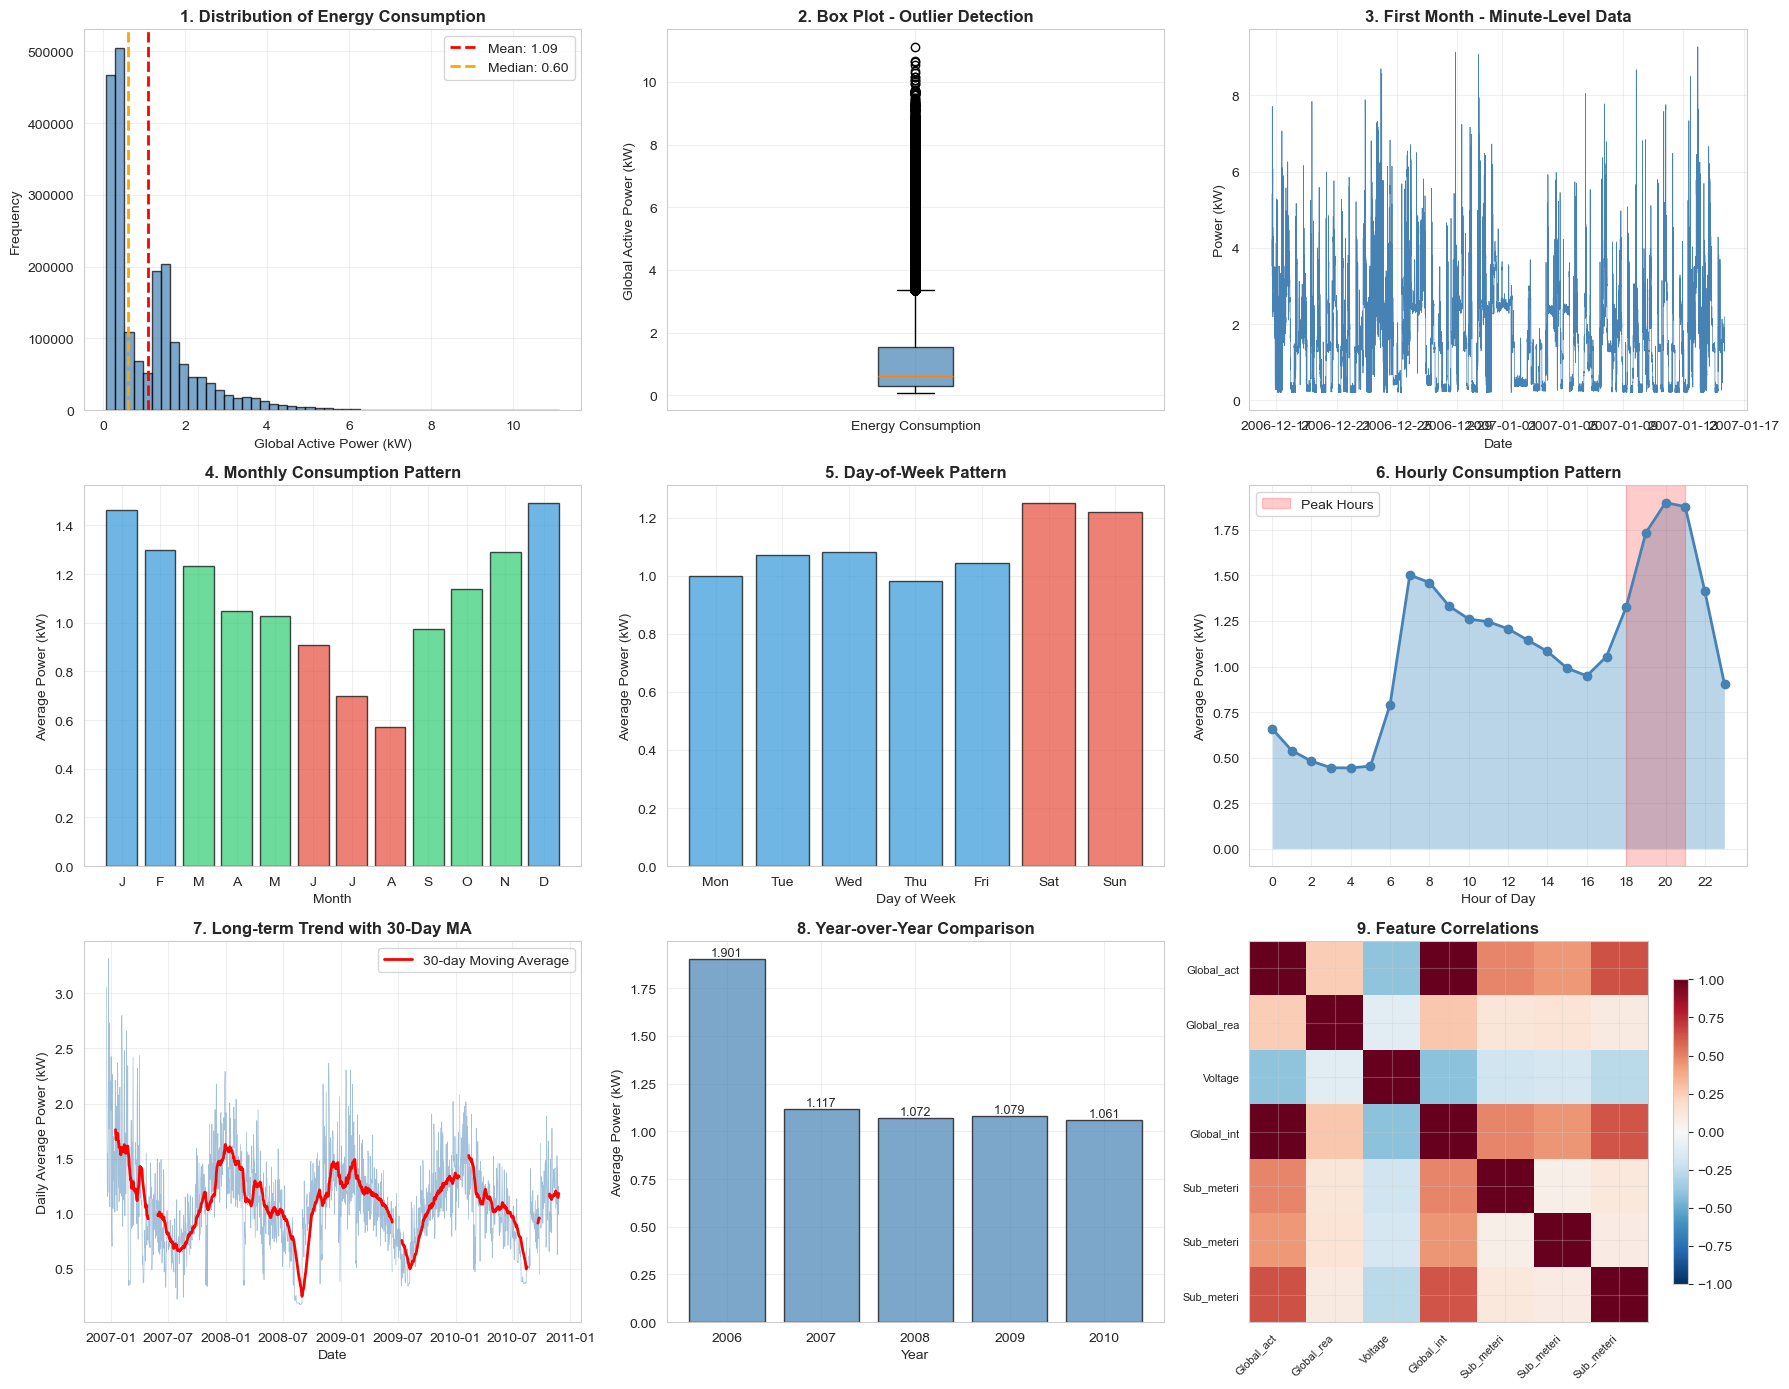


✅ Saved: outputs/exploratory_analysis.png


In [5]:
# =============================================================================
# 2.3 EXPLORATORY DATA ANALYSIS - VISUALIZATIONS
# =============================================================================

print()
print("=" * 70)
print(" 📈 2.3 EXPLORATORY DATA ANALYSIS")
print("=" * 70)
print()
print("Creating comprehensive 9-panel visualization...")
print()

# Create figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

target = 'Global_active_power'

# -------------------------------------------------------------------------
# Panel 1: Distribution Histogram (Top-Left)
# -------------------------------------------------------------------------
ax = axes[0, 0]
ax.hist(df[target].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(df[target].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df[target].mean():.2f}')
ax.axvline(df[target].median(), color='orange', linestyle='--', linewidth=2, 
           label=f'Median: {df[target].median():.2f}')
ax.set_xlabel('Global Active Power (kW)')
ax.set_ylabel('Frequency')
ax.set_title('1. Distribution of Energy Consumption', fontweight='bold')
ax.legend()

# -------------------------------------------------------------------------
# Panel 2: Box Plot (Top-Center)
# -------------------------------------------------------------------------
ax = axes[0, 1]
bp = ax.boxplot(df[target].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7))
ax.set_ylabel('Global Active Power (kW)')
ax.set_title('2. Box Plot - Outlier Detection', fontweight='bold')
ax.set_xticklabels(['Energy Consumption'])

# -------------------------------------------------------------------------
# Panel 3: First Month Time Series (Top-Right)
# -------------------------------------------------------------------------
ax = axes[0, 2]
sample = df[df['datetime'] < df['datetime'].min() + pd.Timedelta(days=30)]
ax.plot(sample['datetime'], sample[target], linewidth=0.5, color='steelblue')
ax.set_xlabel('Date')
ax.set_ylabel('Power (kW)')
ax.set_title('3. First Month - Minute-Level Data', fontweight='bold')

# -------------------------------------------------------------------------
# Panel 4: Monthly Pattern (Middle-Left)
# -------------------------------------------------------------------------
ax = axes[1, 0]
df['month'] = df['datetime'].dt.month
monthly = df.groupby('month')[target].mean()
colors = ['#3498DB' if m in [12, 1, 2] else '#E74C3C' if m in [6, 7, 8] else '#2ECC71' 
          for m in monthly.index]
ax.bar(monthly.index, monthly.values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Month')
ax.set_ylabel('Average Power (kW)')
ax.set_title('4. Monthly Consumption Pattern', fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# -------------------------------------------------------------------------
# Panel 5: Day of Week Pattern (Middle-Center)
# -------------------------------------------------------------------------
ax = axes[1, 1]
df['dayofweek'] = df['datetime'].dt.dayofweek
daily = df.groupby('dayofweek')[target].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors = ['#3498DB'] * 5 + ['#E74C3C'] * 2  # Weekdays blue, weekend red
ax.bar(range(7), daily.values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Power (kW)')
ax.set_title('5. Day-of-Week Pattern', fontweight='bold')
ax.set_xticks(range(7))
ax.set_xticklabels(days)

# -------------------------------------------------------------------------
# Panel 6: Hourly Pattern (Middle-Right)
# -------------------------------------------------------------------------
ax = axes[1, 2]
df['hour'] = df['datetime'].dt.hour
hourly = df.groupby('hour')[target].mean()
ax.plot(hourly.index, hourly.values, marker='o', linewidth=2, color='steelblue')
ax.fill_between(hourly.index, hourly.values, alpha=0.3)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Power (kW)')
ax.set_title('6. Hourly Consumption Pattern', fontweight='bold')
ax.set_xticks(range(0, 24, 2))
ax.axvspan(18, 21, alpha=0.2, color='red', label='Peak Hours')
ax.legend()

# -------------------------------------------------------------------------
# Panel 7: Yearly Trend with Moving Average (Bottom-Left)
# -------------------------------------------------------------------------
ax = axes[2, 0]
df['date'] = df['datetime'].dt.date
daily_avg = df.groupby('date')[target].mean()
daily_avg.index = pd.to_datetime(daily_avg.index)
ax.plot(daily_avg.index, daily_avg.values, linewidth=0.5, alpha=0.5, color='steelblue')
ax.plot(daily_avg.index, daily_avg.rolling(30).mean(), linewidth=2, color='red', 
        label='30-day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Average Power (kW)')
ax.set_title('7. Long-term Trend with 30-Day MA', fontweight='bold')
ax.legend()

# -------------------------------------------------------------------------
# Panel 8: Year-over-Year Comparison (Bottom-Center)
# -------------------------------------------------------------------------
ax = axes[2, 1]
df['year'] = df['datetime'].dt.year
yearly = df.groupby('year')[target].mean()
bars = ax.bar(yearly.index.astype(str), yearly.values, color='steelblue', 
              edgecolor='black', alpha=0.7)
ax.set_xlabel('Year')
ax.set_ylabel('Average Power (kW)')
ax.set_title('8. Year-over-Year Comparison', fontweight='bold')
# Add value labels
for bar, val in zip(bars, yearly.values):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# -------------------------------------------------------------------------
# Panel 9: Correlation Heatmap (Bottom-Right)
# -------------------------------------------------------------------------
ax = axes[2, 2]
numeric_cols = df.select_dtypes(include=[np.number]).columns[:7]
corr_matrix = df[numeric_cols].corr()
im = ax.imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels([c[:10] for c in numeric_cols], rotation=45, ha='right', fontsize=8)
ax.set_yticklabels([c[:10] for c in numeric_cols], fontsize=8)
ax.set_title('9. Feature Correlations', fontweight='bold')
plt.colorbar(im, ax=ax, shrink=0.8)

# Adjust layout and save
plt.tight_layout()
plt.savefig(f"{CONFIG['OUTPUT_DIR']}/exploratory_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print()
print(f"✅ Saved: {CONFIG['OUTPUT_DIR']}/exploratory_analysis.png")

---

## 📤 Output Explanation

### Panel-by-Panel Insights

| Panel | Key Observation |
|-------|-----------------|
| **1. Distribution** | Right-skewed; most consumption is low with occasional spikes |
| **2. Box Plot** | Many outliers above 3 kW (high-usage periods) |
| **3. First Month** | High granularity; visible daily cycles |
| **4. Monthly** | **Winter (Dec-Feb) highest** - heating demand |
| **5. Day of Week** | **Weekend consumption higher** - people at home |
| **6. Hourly** | **Evening peak (18-21h)** - cooking, entertainment |
| **7. Trend** | Yearly oscillation visible; relatively stable overall |
| **8. Year Comparison** | 2007-2010 relatively consistent |
| **9. Correlations** | Sub-metering shows which appliances correlate with total power |

## 💡 Key Insights Summary

### Three Types of Seasonality Detected

1. **Yearly Seasonality**
   - Higher in winter (heating), lower in summer
   - Pattern: Dec-Feb > Mar-May > Jun-Aug

2. **Weekly Seasonality**  
   - Weekend > Weekdays
   - Pattern: Sat/Sun > Mon-Fri

3. **Daily Seasonality**
   - Evening peak (18:00-21:00)
   - Low overnight (00:00-06:00)
   - Pattern: Morning rise → Midday → Evening peak → Night drop

### 📊 Implications for Modeling

| Finding | Implication |
|---------|-------------|
| Multiple seasonalities | Need features for day, week, month, year |
| Right-skewed distribution | May benefit from log transformation |
| Outliers present | Consider robust models or outlier handling |
| Strong autocorrelation | Lag features will be important |

## 💡 Insights for Beginners

### What is a Moving Average?
A moving average smooths out short-term fluctuations to reveal trends. A 30-day MA takes the average of the past 30 days at each point.

### Why Check Multiple Seasonalities?
Different patterns occur at different time scales:
- **Daily**: Human activity cycles (sleep, work, meals)
- **Weekly**: Work vs. weekend patterns
- **Yearly**: Weather/temperature effects

Models need to capture ALL these patterns for accurate forecasting.

---

---

# 🔧 SECTION 3: DATA PREPARATION

---

## 🎯 What's Happening in This Section?

Raw data is rarely ready for ML models. We need to:

1. **Resample** from minute-level to daily averages
2. **Handle missing values** with appropriate imputation
3. **Create Prophet-compatible format** (columns: ds, y)
4. **Visualize** the cleaned data to verify quality

## 📋 Steps We'll Follow

| Step | Action | Why? |
|------|--------|------|
| 1 | Set datetime as index | Required for resampling |
| 2 | Resample to daily frequency | Reduce noise, focus on daily patterns |
| 3 | Handle missing values | ML models can't handle NaN |
| 4 | Rename columns to ds/y | Prophet convention, keeps code consistent |
| 5 | Visualize cleaned data | Verify quality and identify patterns |

## 🤔 Why Resample to Daily?

| Frequency | Records | Pros | Cons |
|-----------|---------|------|------|
| Minute | 2M+ | High detail | Noisy, slow training |
| Hourly | ~35K | Good detail | Still large |
| **Daily** | **~1.4K** | **Balanced** | **Loses intraday patterns** |
| Weekly | ~200 | Very smooth | Loses weekly patterns |

**Daily frequency** is ideal because:
- Captures weekly and yearly seasonality
- Manageable dataset size
- Reduces noise while preserving trends

---

## 3.1 Resampling & Cleaning

### What is Resampling?

Converting from one frequency to another. For downsampling (minute → daily):
- We aggregate (mean, sum, etc.) all values within each day
- Result: One value per day instead of 1,440 values (60 min × 24 hrs)
```
Minute data:  [0.5, 0.6, 0.4, ..., 1.2, 1.1, 1.3]  ← 1,440 values per day
                              ↓ resample('D').mean()
Daily data:   [1.09]                               ← 1 value per day
```

### Missing Value Strategy

We use a **hybrid approach**:

| Method | What It Does | When It Helps |
|--------|--------------|---------------|
| `ffill()` | Use previous day's value | Most gaps (gradual changes) |
| `bfill()` | Use next day's value | Gaps at the start |
| `interpolate('linear')` | Average of neighbors | Any remaining gaps |

---

In [6]:
# =============================================================================
# 3.1 DATA CLEANING & RESAMPLING
# =============================================================================

print()
print("=" * 70)
print(" 🔧 3.1 DATA CLEANING & RESAMPLING")
print("=" * 70)
print()

# -----------------------------------------------------------------------------
# Step 1: Set datetime as index
# -----------------------------------------------------------------------------
print("Step 1: Setting datetime as index...")
df_indexed = df.set_index('datetime')
print(f"   ✓ Index type: {type(df_indexed.index).__name__}")

# -----------------------------------------------------------------------------
# Step 2: Resample to daily frequency
# -----------------------------------------------------------------------------
print()
print("Step 2: Resampling to daily frequency...")
print(f"   • Original records: {len(df_indexed):,} (minute-level)")

# Keep only the target column and resample
df_processed = df_indexed[['Global_active_power']].resample(CONFIG['RESAMPLE_FREQ']).mean()

print(f"   • Resampled records: {len(df_processed):,} (daily)")
print(f"   • Compression ratio: {len(df_indexed)/len(df_processed):.0f}x reduction")

# -----------------------------------------------------------------------------
# Step 3: Handle missing values
# -----------------------------------------------------------------------------
print()
print("Step 3: Handling missing values...")

missing_before = df_processed.isnull().sum().sum()
print(f"   • Missing values before: {missing_before}")

# Hybrid imputation strategy:
# 1. Forward fill - use previous day's value
# 2. Backward fill - for any remaining at the start
# 3. Linear interpolation - for any remaining gaps
df_processed = df_processed.ffill()      # Forward fill
df_processed = df_processed.bfill()      # Backward fill  
df_processed = df_processed.interpolate(method='linear')  # Interpolate remaining

missing_after = df_processed.isnull().sum().sum()
print(f"   • Missing values after: {missing_after}")
print(f"   • Imputation method: ffill → bfill → linear interpolation")

# -----------------------------------------------------------------------------
# Step 4: Create Prophet-compatible format
# -----------------------------------------------------------------------------
print()
print("Step 4: Creating Prophet-compatible format...")

# Prophet requires columns named 'ds' (date) and 'y' (target)
df_processed = df_processed.reset_index()
df_processed.columns = ['ds', 'y']

print(f"   • Columns renamed: datetime → ds, Global_active_power → y")
print(f"   • Final shape: {df_processed.shape}")

# -----------------------------------------------------------------------------
# Display summary
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print(" DATA PREPARATION SUMMARY")
print("─" * 70)
print()
print(f"   📊 Final dataset shape:    {df_processed.shape[0]:,} rows × {df_processed.shape[1]} columns")
print(f"   📅 Date range:             {df_processed['ds'].min().date()} to {df_processed['ds'].max().date()}")
print(f"   📅 Duration:               {(df_processed['ds'].max() - df_processed['ds'].min()).days:,} days")
print(f"   🎯 Target column:          'y' (daily average power in kW)")
print(f"   ✅ Missing values:          {df_processed.isnull().sum().sum()} (none)")
print()

# Show sample
print("─" * 70)
print(" SAMPLE DATA (First 5 rows)")
print("─" * 70)
display(df_processed.head())


 🔧 3.1 DATA CLEANING & RESAMPLING

Step 1: Setting datetime as index...
   ✓ Index type: DatetimeIndex

Step 2: Resampling to daily frequency...
   • Original records: 2,075,259 (minute-level)
   • Resampled records: 1,442 (daily)
   • Compression ratio: 1439x reduction

Step 3: Handling missing values...
   • Missing values before: 9
   • Missing values after: 0
   • Imputation method: ffill → bfill → linear interpolation

Step 4: Creating Prophet-compatible format...
   • Columns renamed: datetime → ds, Global_active_power → y
   • Final shape: (1442, 2)

──────────────────────────────────────────────────────────────────────
 DATA PREPARATION SUMMARY
──────────────────────────────────────────────────────────────────────

   📊 Final dataset shape:    1,442 rows × 2 columns
   📅 Date range:             2006-12-16 to 2010-11-26
   📅 Duration:               1,441 days
   🎯 Target column:          'y' (daily average power in kW)
   ✅ Missing values:          0 (none)

───────────────────

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


---

## 3.2 Visualize Cleaned Data

### 📊 What We're Creating

| Panel | Content | Purpose |
|-------|---------|---------|
| **Top** | Full time series + mean line | See overall data range and central tendency |
| **Bottom** | Data + 7-day & 30-day moving averages | Reveal short-term and long-term trends |

### 🔧 What is a Moving Average?

A **moving average (MA)** smooths out short-term fluctuations to reveal underlying trends:

| MA Type | Window | What It Reveals |
|---------|--------|-----------------|
| **7-day MA** | 1 week | Weekly patterns, removes daily noise |
| **30-day MA** | 1 month | Monthly/seasonal patterns, removes weekly noise |
```
Raw data:    ~~~∿~~~∿~~~∿~~~  (noisy)
7-day MA:    ~~∿~~∿~~∿~~∿~~   (smoother)
30-day MA:   ─∿─∿─∿─∿─∿─∿─    (smoothest - shows trend)
```

---


 📈 3.2 VISUALIZE CLEANED DATA



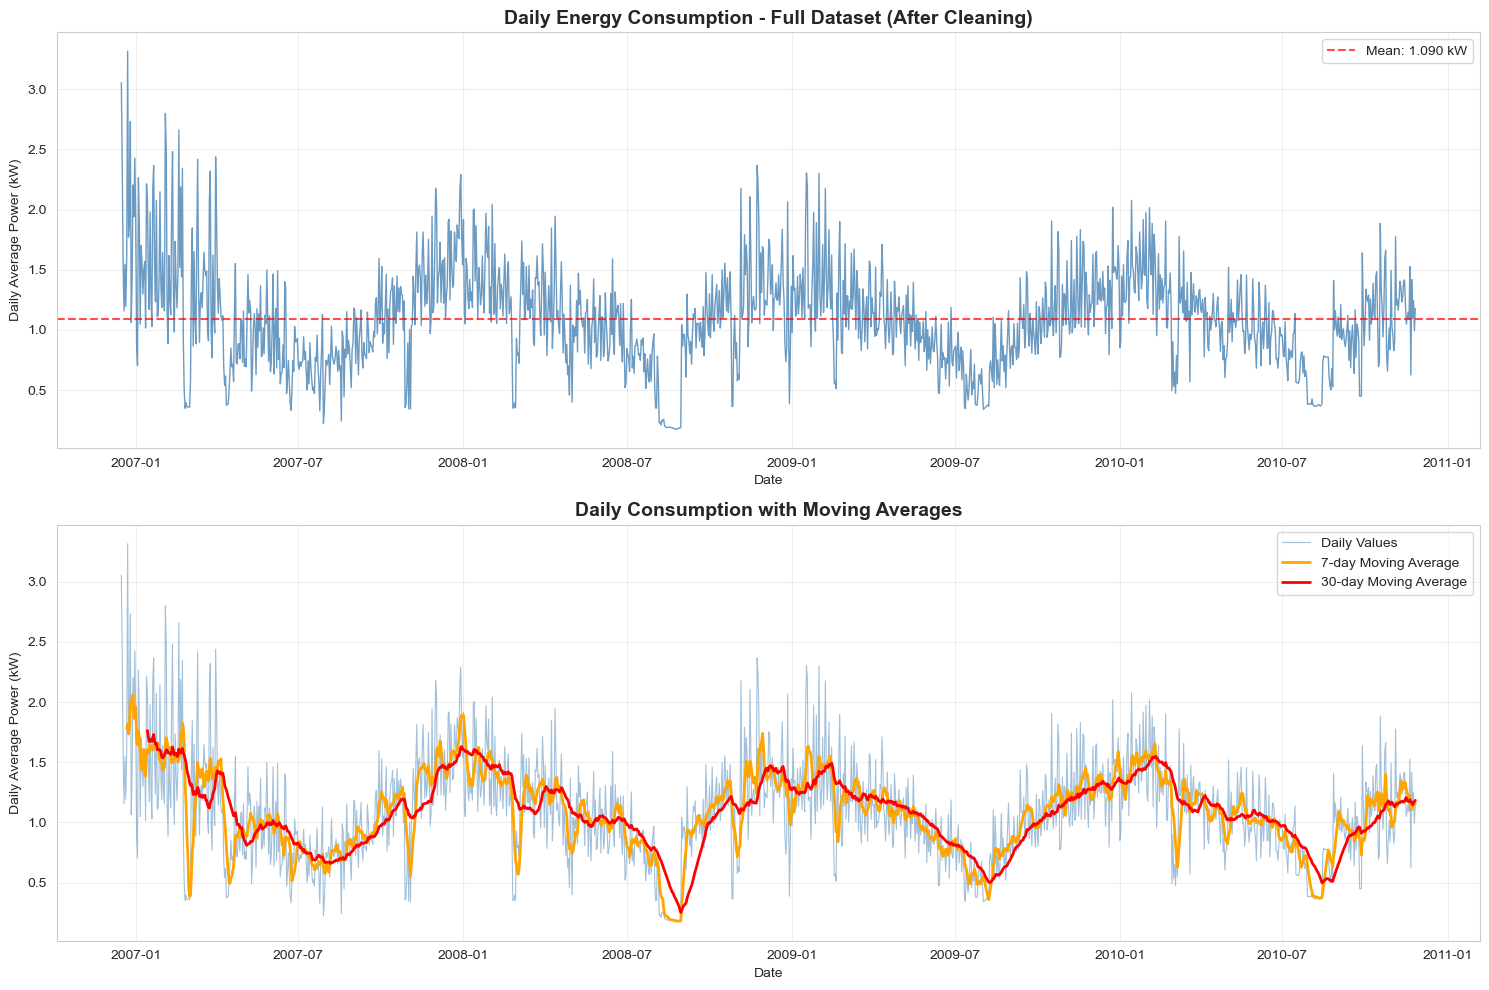


✅ Saved: outputs/cleaned_timeseries.png

💡 Observations:
   • Yearly seasonality clearly visible (higher in winter)
   • 7-day MA smooths weekly noise
   • 30-day MA reveals long-term trend


In [7]:
# =============================================================================
# 3.2 VISUALIZE CLEANED DATA
# =============================================================================

print()
print("=" * 70)
print(" 📈 3.2 VISUALIZE CLEANED DATA")
print("=" * 70)
print()

# Create 2-panel visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# -------------------------------------------------------------------------
# Panel 1: Full Time Series
# -------------------------------------------------------------------------
ax = axes[0]
ax.plot(df_processed['ds'], df_processed['y'], linewidth=1, color='steelblue', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Average Power (kW)')
ax.set_title('Daily Energy Consumption - Full Dataset (After Cleaning)', fontweight='bold', fontsize=14)
ax.grid(True, alpha=0.3)

# Add annotations
ax.axhline(y=df_processed['y'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {df_processed["y"].mean():.3f} kW')
ax.legend(loc='upper right')

# -------------------------------------------------------------------------
# Panel 2: With Moving Averages
# -------------------------------------------------------------------------
ax = axes[1]
ax.plot(df_processed['ds'], df_processed['y'], linewidth=0.8, alpha=0.5, 
        color='steelblue', label='Daily Values')
ax.plot(df_processed['ds'], df_processed['y'].rolling(7).mean(), 
        linewidth=2, color='orange', label='7-day Moving Average')
ax.plot(df_processed['ds'], df_processed['y'].rolling(30).mean(), 
        linewidth=2, color='red', label='30-day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Average Power (kW)')
ax.set_title('Daily Consumption with Moving Averages', fontweight='bold', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{CONFIG['OUTPUT_DIR']}/cleaned_timeseries.png", dpi=300, bbox_inches='tight')
plt.show()

print()
print(f"✅ Saved: {CONFIG['OUTPUT_DIR']}/cleaned_timeseries.png")
print()
print("💡 Observations:")
print("   • Yearly seasonality clearly visible (higher in winter)")
print("   • 7-day MA smooths weekly noise")
print("   • 30-day MA reveals long-term trend")

---

## 📤 Section 3 Output Explanation

### 3.1 Resampling Results

| Metric | Before | After |
|--------|--------|-------|
| **Records** | 2,075,259 (minute) | 1,442 (daily) |
| **Compression** | - | 1,439x reduction |
| **Missing values** | 9 | 0 |
| **Columns** | datetime, Global_active_power | ds, y |

### 3.2 Visualization Results

The two-panel visualization shows:

| Panel | What You See | What It Means |
|-------|--------------|---------------|
| **Top** | Blue line fluctuating around red dashed mean (~1.09 kW) | Data is centered, no major outliers |
| **Bottom** | Orange (7-day) and red (30-day) smoothed lines | Clear yearly seasonality pattern |

### Key Patterns Identified

| Pattern | Evidence | Implication for Modeling |
|---------|----------|--------------------------|
| **Yearly seasonality** | Peaks every Dec-Feb, troughs Jun-Aug | Need features for month/season |
| **No trend** | Mean stays ~1.09 kW across 4 years | Data is stationary (good for ARIMA) |
| **Daily volatility** | Fluctuations around MA lines | Lag features will help capture this |

---

## 💡 Key Learnings

### 🔺 Why Winter Peaks?
The household is in **France**. Higher winter consumption due to:
- Electric heating systems
- Shorter daylight hours → more lighting
- More time spent indoors

### 🔻 Why Summer Troughs?
Lower summer consumption because:
- No heating needed
- Longer daylight → less artificial lighting
- Vacations (household empty)

### 📊 What the Moving Averages Tell Us
- **30-day MA (red)** = The **signal** our models should capture
- **Daily fluctuations** = **Noise** models should NOT overfit to
- A good model predicts values close to the 30-day MA trend

---

## 💡 Insights for Beginners

### Why Forward Fill First?
`ffill()` assumes missing values are similar to the previous day. This is reasonable for energy consumption which changes gradually day-to-day.

### Why the ds/y Naming Convention?
Prophet requires specific column names:
- `ds` = "datestamp" (time column)
- `y` = "y-value" (target to predict)

This convention also keeps our code consistent across different models.

### What Did We Lose by Resampling?
By going from minute → daily, we lost:
- Morning vs. evening patterns
- Peak hour information (18:00-21:00)

What we gained:
- 1,439x smaller dataset (faster training)
- Cleaner signal (less noise)
- Focus on weekly/yearly patterns (more important for forecasting)

---


---

# 🛠️ SECTION 4: FEATURE ENGINEERING

---

## 🎯 What's Happening in This Section?

Feature engineering is **the most important step** in ML. We transform raw data into features that help models learn patterns.

> "Coming up with features is difficult, time-consuming, requires expert knowledge. Applied machine learning is basically feature engineering." - Andrew Ng

## 📋 Features We'll Create

| Category | Features | Purpose |
|----------|----------|---------|
| **Temporal** | day_of_week, month, quarter, is_weekend, season | Capture calendar patterns |
| **Lag** | lag_1, lag_7, lag_14, lag_30 | Capture autocorrelation |
| **Rolling** | rolling_mean_7, rolling_std_7, etc. | Capture trends and volatility |
| **EMA** | ema_7, ema_30 | Capture weighted recent trends |
| **Difference** | diff_1, diff_7 | Capture changes/momentum |

## 🔧 Using utils.py Functions

We'll use pre-built functions from `utils.py`:

```python
add_temporal_features(df)           # Add calendar-based features
add_lag_features(df, col, lags)     # Add historical value lags
add_rolling_features(df, col, windows)  # Add rolling statistics
add_ema_features(df, col, spans)    # Add exponential moving averages
```

### Why Use utils.py?
1. **DRY Principle**: Don't Repeat Yourself
2. **Reusability**: Same functions for other projects
3. **Maintainability**: Fix bugs in one place
4. **Testability**: Functions can be unit tested

---

## 4.1 Creating All Features

### 🎯 What's Happening in This Subsection?

We systematically create **features** from our single target column using:
1. Temporal features (calendar-based patterns)
2. Lag features (historical values)
3. Rolling features (moving statistics)
4. EMA features (weighted averages)
5. Difference features (rate of change)

### 📋 Step-by-Step Process

| Step | Function | Purpose |
|------|----------|---------|
| 1 | `add_temporal_features()` | Calendar patterns (day, month, season) |
| 2 | `add_lag_features()` | Historical values (1, 2, 3, 7, 14, 30 days) |
| 3 | `add_rolling_features()` | Moving statistics (mean, std, min, max) |
| 4 | `add_ema_features()` | Exponential moving averages |
| 5 | Manual addition | Difference/momentum features |
| 6 | `dropna()` | Clean NaN from lag/rolling operations |

---

In [8]:
# =============================================================================
# 4.1 CREATING FEATURES (Using utils.py)
# =============================================================================

print()
print("=" * 70)
print(" 🛠️ 4.1 CREATING FEATURES")
print("=" * 70)
print()

# -----------------------------------------------------------------------------
# Prepare DataFrame for feature engineering
# -----------------------------------------------------------------------------
print("Preparing data for feature engineering...")

# Create a copy and set index
df_features = df_processed.copy()
df_features['ds'] = pd.to_datetime(df_features['ds'])
df_features = df_features.set_index('ds')
df_features = df_features.rename(columns={'y': 'Global_active_power'})

print(f"   ✓ Input shape: {df_features.shape}")
print()

# -----------------------------------------------------------------------------
# Step 1: Add Temporal Features
# -----------------------------------------------------------------------------
print("─" * 70)
print("Step 1: Adding TEMPORAL features...")
print("─" * 70)

df_features = add_temporal_features(df_features)

temporal_features = ['day_of_week', 'day_of_month', 'month', 'quarter', 'year',
                     'week_of_year', 'day_of_year', 'is_weekend', 'season',
                     'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos']

print("   Features added:")
for feat in temporal_features:
    if feat in df_features.columns:
        print(f"      • {feat}")

# -----------------------------------------------------------------------------
# Step 2: Add Lag Features
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print("Step 2: Adding LAG features...")
print("─" * 70)
print(f"   Lag periods: {CONFIG['LAG_PERIODS']}")

df_features = add_lag_features(df_features, 'Global_active_power', CONFIG['LAG_PERIODS'])

lag_features = [f'lag_{lag}' for lag in CONFIG['LAG_PERIODS']]
print("   Features added:")
for feat in lag_features:
    print(f"      • {feat}")

# -----------------------------------------------------------------------------
# Step 3: Add Rolling Features
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print("Step 3: Adding ROLLING features...")
print("─" * 70)
print(f"   Window sizes: {CONFIG['ROLLING_WINDOWS']}")

df_features = add_rolling_features(df_features, 'Global_active_power', CONFIG['ROLLING_WINDOWS'])

rolling_features = [col for col in df_features.columns if col.startswith('rolling_')]
print("   Features added:")
for feat in rolling_features:
    print(f"      • {feat}")

# -----------------------------------------------------------------------------
# Step 4: Add EMA Features
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print("Step 4: Adding EMA features...")
print("─" * 70)
print(f"   EMA spans: {CONFIG['EMA_SPANS']}")

df_features = add_ema_features(df_features, 'Global_active_power', CONFIG['EMA_SPANS'])

ema_features = [col for col in df_features.columns if col.startswith('ema_')]
print("   Features added:")
for feat in ema_features:
    print(f"      • {feat}")

# -----------------------------------------------------------------------------
# Step 5: Add Difference Features (manually)
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print("Step 5: Adding DIFFERENCE features...")
print("─" * 70)

df_features['diff_1'] = df_features['Global_active_power'].diff(1)
df_features['diff_7'] = df_features['Global_active_power'].diff(7)

diff_features = ['diff_1', 'diff_7']
print("   Features added:")
for feat in diff_features:
    print(f"      • {feat}")

# -----------------------------------------------------------------------------
# Step 6: Handle NaN rows from lagging operations
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print("Step 6: Removing rows with NaN...")
print("─" * 70)

initial_rows = len(df_features)
df_features = df_features.dropna()
dropped_rows = initial_rows - len(df_features)

print(f"   • Rows before: {initial_rows}")
print(f"   • Rows dropped: {dropped_rows} (due to lag/rolling NaN)")
print(f"   • Rows after: {len(df_features)}")

# -----------------------------------------------------------------------------
# Final formatting
# -----------------------------------------------------------------------------
# Reset index and rename back
df_features = df_features.reset_index()
df_features = df_features.rename(columns={'index': 'ds', 'Global_active_power': 'y'})

# Get feature columns (everything except ds and y)
feature_cols = [col for col in df_features.columns if col not in ['ds', 'y']]

# -----------------------------------------------------------------------------
# Print Summary
# -----------------------------------------------------------------------------
print()
print("=" * 70)
print(" FEATURE ENGINEERING SUMMARY")
print("=" * 70)
print()
print(f"   📊 Final dataset shape: {df_features.shape}")
print(f"   🎯 Target column: 'y'")
print(f"   📅 Date column: 'ds'")
print(f"   🔧 Total features created: {len(feature_cols)}")
print()
print(f"   Feature breakdown:")
print(f"      • Temporal features: {len([f for f in feature_cols if f in temporal_features])}")
print(f"      • Lag features:      {len(lag_features)}")
print(f"      • Rolling features:  {len(rolling_features)}")
print(f"      • EMA features:      {len(ema_features)}")
print(f"      • Diff features:     {len(diff_features)}")


 🛠️ 4.1 CREATING FEATURES

Preparing data for feature engineering...
   ✓ Input shape: (1442, 1)

──────────────────────────────────────────────────────────────────────
Step 1: Adding TEMPORAL features...
──────────────────────────────────────────────────────────────────────
   Features added:
      • day_of_week
      • day_of_month
      • month
      • quarter
      • year
      • week_of_year
      • day_of_year
      • is_weekend
      • season
      • day_of_week_sin
      • day_of_week_cos
      • month_sin
      • month_cos

──────────────────────────────────────────────────────────────────────
Step 2: Adding LAG features...
──────────────────────────────────────────────────────────────────────
   Lag periods: [1, 2, 3, 7, 14, 30]
   Features added:
      • lag_1
      • lag_2
      • lag_3
      • lag_7
      • lag_14
      • lag_30

──────────────────────────────────────────────────────────────────────
Step 3: Adding ROLLING features...
──────────────────────────────────────

---

## 4.2 Feature Correlation Analysis

### 🎯 What's Happening in This Subsection?

Now that we have 41 features, we need to understand:
1. **Which features are most predictive** of energy consumption?
2. **How do features relate to each other?** (multicollinearity)
3. **Are there any useless features** we could remove?

### 📊 What We're Calculating

| Analysis | Method | Output |
|----------|--------|--------|
| **Feature-Target Correlation** | Pearson correlation with 'y' | Ranked list of features |
| **Feature-Feature Correlation** | Correlation matrix | Heatmap visualization |

### 🔍 What is Correlation?

Correlation measures linear relationship between two variables:

| Value | Interpretation | Example |
|-------|----------------|---------|
| **+1.0** | Perfect positive | As X increases, Y increases proportionally |
| **+0.7 to +1.0** | Strong positive | lag_1 vs target |
| **+0.3 to +0.7** | Moderate positive | month_cos vs target |
| **-0.3 to +0.3** | Weak/None | Random noise |
| **-0.7 to -0.3** | Moderate negative | season vs target |
| **-1.0** | Perfect negative | As X increases, Y decreases proportionally |

### 🎯 Why This Matters for Modeling

- **High correlation features** → Likely important for predictions
- **Low correlation features** → May not add value (consider removing)
- **Highly correlated features with each other** → Multicollinearity (redundant information)

---


 📊 4.2 FEATURE CORRELATION ANALYSIS

🔝 Top 20 Features by Correlation with Target:
────────────────────────────────────────────────────────────

   1. ema_7                          +0.6721 ████████████████████
   2. rolling_mean_7                 +0.6665 ███████████████████
   3. rolling_mean_14                +0.6354 ███████████████████
   4. ema_30                         +0.6239 ██████████████████
   5. rolling_max_7                  +0.6202 ██████████████████
   6. rolling_min_7                  +0.6121 ██████████████████
   7. lag_1                          +0.6110 ██████████████████
   8. rolling_mean_30                +0.5896 █████████████████
   9. day_of_year_cos                +0.5862 █████████████████
  10. rolling_max_14                 +0.5852 █████████████████
  11. rolling_min_14                 +0.5553 ████████████████
  12. rolling_max_30                 +0.5435 ████████████████
  13. lag_7                          +0.5422 ████████████████
  14. lag_3                

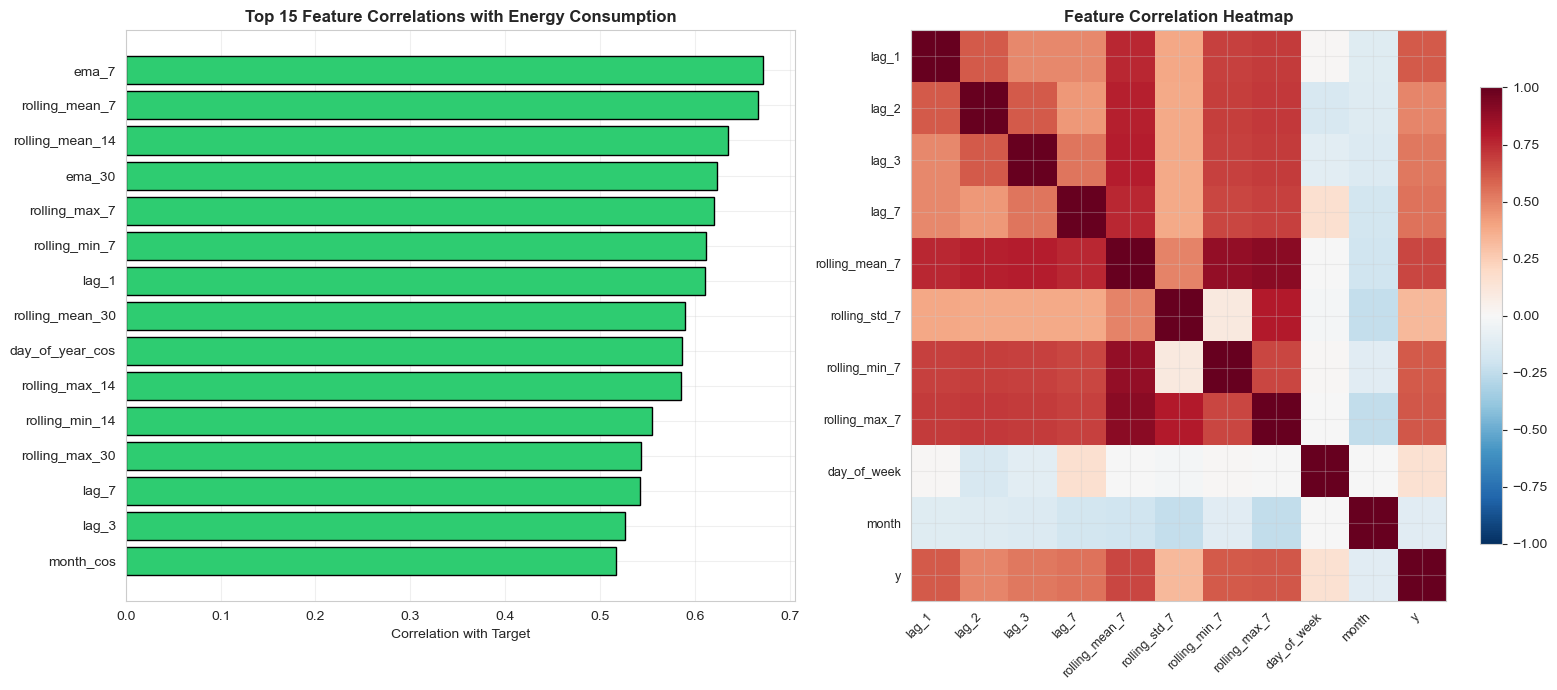


✅ Saved: outputs/feature_correlations.png


In [9]:
# =============================================================================
# 4.2 FEATURE CORRELATION ANALYSIS
# =============================================================================

print()
print("=" * 70)
print(" 📊 4.2 FEATURE CORRELATION ANALYSIS")
print("=" * 70)
print()

# Calculate correlations with target
correlations = df_features[feature_cols + ['y']].corr()['y'].drop('y').sort_values(ascending=False)

print("🔝 Top 20 Features by Correlation with Target:")
print("─" * 60)
print()

for i, (feat, corr) in enumerate(correlations.head(20).items(), 1):
    bar_length = int(abs(corr) * 30)
    bar = '█' * bar_length
    sign = '+' if corr > 0 else '-'
    print(f"  {i:2d}. {feat:30s} {sign}{abs(corr):.4f} {bar}")

print()
print("─" * 60)
print("🔻 Bottom 5 Features (Lowest Correlation):")
print("─" * 60)

for i, (feat, corr) in enumerate(correlations.tail(5).items(), 1):
    print(f"  {i}. {feat:30s} {corr:+.4f}")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Panel 1: Top 15 correlations bar chart
top_15 = correlations.head(15)
colors = ['#2ECC71' if c > 0 else '#E74C3C' for c in top_15.values]

axes[0].barh(range(len(top_15)), top_15.values, color=colors, edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Correlation with Target')
axes[0].set_title('Top 15 Feature Correlations with Energy Consumption', fontweight='bold')
axes[0].invert_yaxis()
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3, axis='x')

# Panel 2: Sample feature correlation heatmap
sample_features = lag_features[:4] + rolling_features[:4] + ['day_of_week', 'month', 'y']
sample_features = [f for f in sample_features if f in df_features.columns]
corr_matrix = df_features[sample_features].corr()

im = axes[1].imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(corr_matrix)))
axes[1].set_yticks(range(len(corr_matrix)))
axes[1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=9)
axes[1].set_yticklabels(corr_matrix.columns, fontsize=9)
axes[1].set_title('Feature Correlation Heatmap', fontweight='bold')
plt.colorbar(im, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.savefig(f"{CONFIG['OUTPUT_DIR']}/feature_correlations.png", dpi=300, bbox_inches='tight')
plt.show()

print()
print(f"✅ Saved: {CONFIG['OUTPUT_DIR']}/feature_correlations.png")

---

## 📤 Section 4 Output Explanation

### 4.1 Feature Engineering Results

From a single column (`y`), we engineered **41 predictive features** across 5 categories. The final dataset shape is **(1412, 43)** — 41 features plus `ds` and `y` columns.

**Why 30 rows were dropped**: Lag and rolling operations require historical data. For example, `lag_30` needs 30 previous days, so the first 30 rows have NaN values and must be removed.

### 4.2 Correlation Analysis Results

**Key Observations:**

| Finding | Interpretation |
|---------|----------------|
| EMA & Rolling features rank highest | Smoothed features capture trends better than raw values |
| lag_1 ranks #7 (not #1) | Daily aggregation already smooths data; rolling/EMA add more value |
| Temporal features have negative correlations | Higher consumption in winter (season=4) creates inverse relationship |
| Bottom features (month, quarter) | Redundant — already captured by cyclical encodings |

**Heatmap Pattern**: Strong red blocks among lag/rolling features indicate **multicollinearity** — these features share similar information, but tree-based models (like LightGBM) handle this well.

---

## 💡 Key Insights

### Why EMA/Rolling Beat Raw Lags

| Feature Type | What It Captures | Noise Level |
|--------------|------------------|-------------|
| lag_1 | Single past value | High (one day's fluctuation) |
| rolling_mean_7 | Week's trend | Low (averaged out) |
| ema_7 | Weighted recent trend | Low (smoothed) |

**Conclusion**: Smoothed features provide a cleaner signal for the model to learn from.

---

## 💡 Feature Explanations for Beginners

| Feature Type | What It Is | Example | Why Useful |
|--------------|------------|---------|------------|
| **Lag** | Past values | lag_7 = last week's value | Captures autocorrelation |
| **Rolling** | Window statistics | rolling_mean_7 = 7-day average | Captures trends & volatility |
| **EMA** | Weighted average | ema_7 = recent-weighted average | Reacts faster to changes |
| **Difference** | Change over time | diff_1 = today - yesterday | Captures momentum |
| **Cyclical** | Sin/cos encoding | month_sin, month_cos | Makes Jan close to Dec |

### Why Cyclical Encoding?

Without it: January (1) and December (12) seem far apart.  
With sin/cos: They're adjacent on the unit circle — which reflects reality!

---

---

# ✂️ SECTION 5: TRAIN-TEST SPLIT

---

## 🎯 What's Happening in This Section?

We need to split our data into:
- **Training set** (80%): Used to train models
- **Test set** (20%): Used to evaluate model performance

## ⚠️ Critical: Time Series Split is Different!

For time series data, we **CANNOT use random splitting**. We must use **temporal splitting**.

| Method | Regular ML | Time Series |
|--------|------------|-------------|
| **Random Split** | ✅ OK | ❌ WRONG |
| **Temporal Split** | ❌ Wrong | ✅ CORRECT |

### Why is Random Split Wrong for Time Series?

Random splitting would let the model "peek into the future":
- Training data might include 2010 values
- Test data might include 2007 values
- Model learns future patterns, then "predicts" the past
- This is **data leakage** and gives falsely good results!

### Correct Approach: Temporal Split

```
  |--- Training (80%) ---|--- Test (20%) ---|
2006                    2009               2010
```
Training: Learn from past (2006-2009)
Testing:  Predict future (2009-2010)

---
## 5.1 Splitting the Dataset

### 🎯 What's Happening in This Subsection?

We perform a **temporal split** of the data:
1. Calculate split index (80% of 1,412 samples = index 1,129)
2. Training set: All rows **before** split index
3. Test set: All rows **after** split index
4. Verify no overlap between sets (sanity check)
5. Compare distributions to check for data shift

### 📋 Split Configuration

| Parameter | Value | Calculation |
|-----------|-------|-------------|
| Total samples | 1,412 | After feature engineering |
| Training size | 80% | ~1,129 samples |
| Test size | 20% | ~283 samples |
| Split method | Temporal | No shuffling! |

### ⚠️ Important: NO Shuffling!
```python
# ❌ WRONG for time series:
train_test_split(X, y, shuffle=True)

# ✅ CORRECT for time series:
train = data.iloc[:split_idx]
test = data.iloc[split_idx:]
```

---

In [10]:
# =============================================================================
# 5.1 TRAIN-TEST SPLIT
# =============================================================================

print()
print("=" * 70)
print(" ✂️ 5.1 TRAIN-TEST SPLIT")
print("=" * 70)
print()

# -----------------------------------------------------------------------------
# Calculate split point
# -----------------------------------------------------------------------------
split_idx = int(len(df_features) * (1 - CONFIG['TEST_SIZE']))

print(f"📊 Split Configuration:")
print(f"   • Total samples:    {len(df_features)}")
print(f"   • Training size:    {100 - CONFIG['TEST_SIZE']*100:.0f}%")
print(f"   • Test size:        {CONFIG['TEST_SIZE']*100:.0f}%")
print(f"   • Split index:      {split_idx}")
print()

# -----------------------------------------------------------------------------
# Perform temporal split (NO SHUFFLING!)
# -----------------------------------------------------------------------------
# IMPORTANT: We use iloc (position-based) with ordered indices
# NO random sampling - this is time series!

train_data = df_features.iloc[:split_idx].copy()
test_data = df_features.iloc[split_idx:].copy()

# -----------------------------------------------------------------------------
# Display split information
# -----------------------------------------------------------------------------
print("─" * 70)
print(" TRAINING SET")
print("─" * 70)
print(f"   📊 Samples:    {len(train_data):,}")
print(f"   📅 Date range: {train_data['ds'].min().date()} → {train_data['ds'].max().date()}")
print(f"   📅 Duration:   {(train_data['ds'].max() - train_data['ds'].min()).days} days")
print()

print("─" * 70)
print(" TEST SET")
print("─" * 70)
print(f"   📊 Samples:    {len(test_data):,}")
print(f"   📅 Date range: {test_data['ds'].min().date()} → {test_data['ds'].max().date()}")
print(f"   📅 Duration:   {(test_data['ds'].max() - test_data['ds'].min()).days} days")
print()

# -----------------------------------------------------------------------------
# Verify no overlap (sanity check)
# -----------------------------------------------------------------------------
print("─" * 70)
print(" SANITY CHECK")
print("─" * 70)
train_max = train_data['ds'].max()
test_min = test_data['ds'].min()
print(f"   • Training ends:   {train_max.date()}")
print(f"   • Testing starts:  {test_min.date()}")
print(f"   • Gap:             {(test_min - train_max).days} day(s)")
if test_min > train_max:
    print(f"   ✅ No overlap! Temporal split is correct.")
else:
    print(f"   ❌ WARNING: Overlap detected! Check split logic.")

# -----------------------------------------------------------------------------
# Compare distributions
# -----------------------------------------------------------------------------
print()
print("─" * 70)
print(" DISTRIBUTION COMPARISON")
print("─" * 70)
print(f"   {'Metric':<12s} {'Train':>12s} {'Test':>12s} {'Diff %':>12s}")
print(f"   {'-' * 48}")

for metric, train_val, test_val in [
    ('Mean', train_data['y'].mean(), test_data['y'].mean()),
    ('Std', train_data['y'].std(), test_data['y'].std()),
    ('Min', train_data['y'].min(), test_data['y'].min()),
    ('Max', train_data['y'].max(), test_data['y'].max()),
]:
    diff_pct = ((test_val - train_val) / train_val) * 100 if train_val != 0 else 0
    print(f"   {metric:<12s} {train_val:>12.4f} {test_val:>12.4f} {diff_pct:>+11.1f}%")


 ✂️ 5.1 TRAIN-TEST SPLIT

📊 Split Configuration:
   • Total samples:    1412
   • Training size:    80%
   • Test size:        20%
   • Split index:      1129

──────────────────────────────────────────────────────────────────────
 TRAINING SET
──────────────────────────────────────────────────────────────────────
   📊 Samples:    1,129
   📅 Date range: 2007-01-15 → 2010-02-16
   📅 Duration:   1128 days

──────────────────────────────────────────────────────────────────────
 TEST SET
──────────────────────────────────────────────────────────────────────
   📊 Samples:    283
   📅 Date range: 2010-02-17 → 2010-11-26
   📅 Duration:   282 days

──────────────────────────────────────────────────────────────────────
 SANITY CHECK
──────────────────────────────────────────────────────────────────────
   • Training ends:   2010-02-16
   • Testing starts:  2010-02-17
   • Gap:             1 day(s)
   ✅ No overlap! Temporal split is correct.

────────────────────────────────────────────────────

---

## 5.2 Visualize Train-Test Split

### 🎯 What's Happening in This Subsection?

We create visualizations to verify our split is correct:
1. **Time series plot**: See where the split occurs chronologically
2. **Distribution plot**: Compare train vs test value distributions

### 📊 What We're Creating

| Panel | Content | What to Look For |
|-------|---------|------------------|
| **Top** | Time series with split line | Clear separation, no overlap |
| **Bottom** | Overlapping histograms | Similar shapes = good split |

### 🔍 Why Visualize the Split?

Visual inspection helps catch issues that numbers might miss:
- Is the split point at a seasonal extreme? (e.g., all test data in winter)
- Are there obvious distribution differences?
- Does the test period look representative of the training period?

---


 📈 5.2 VISUALIZE TRAIN-TEST SPLIT



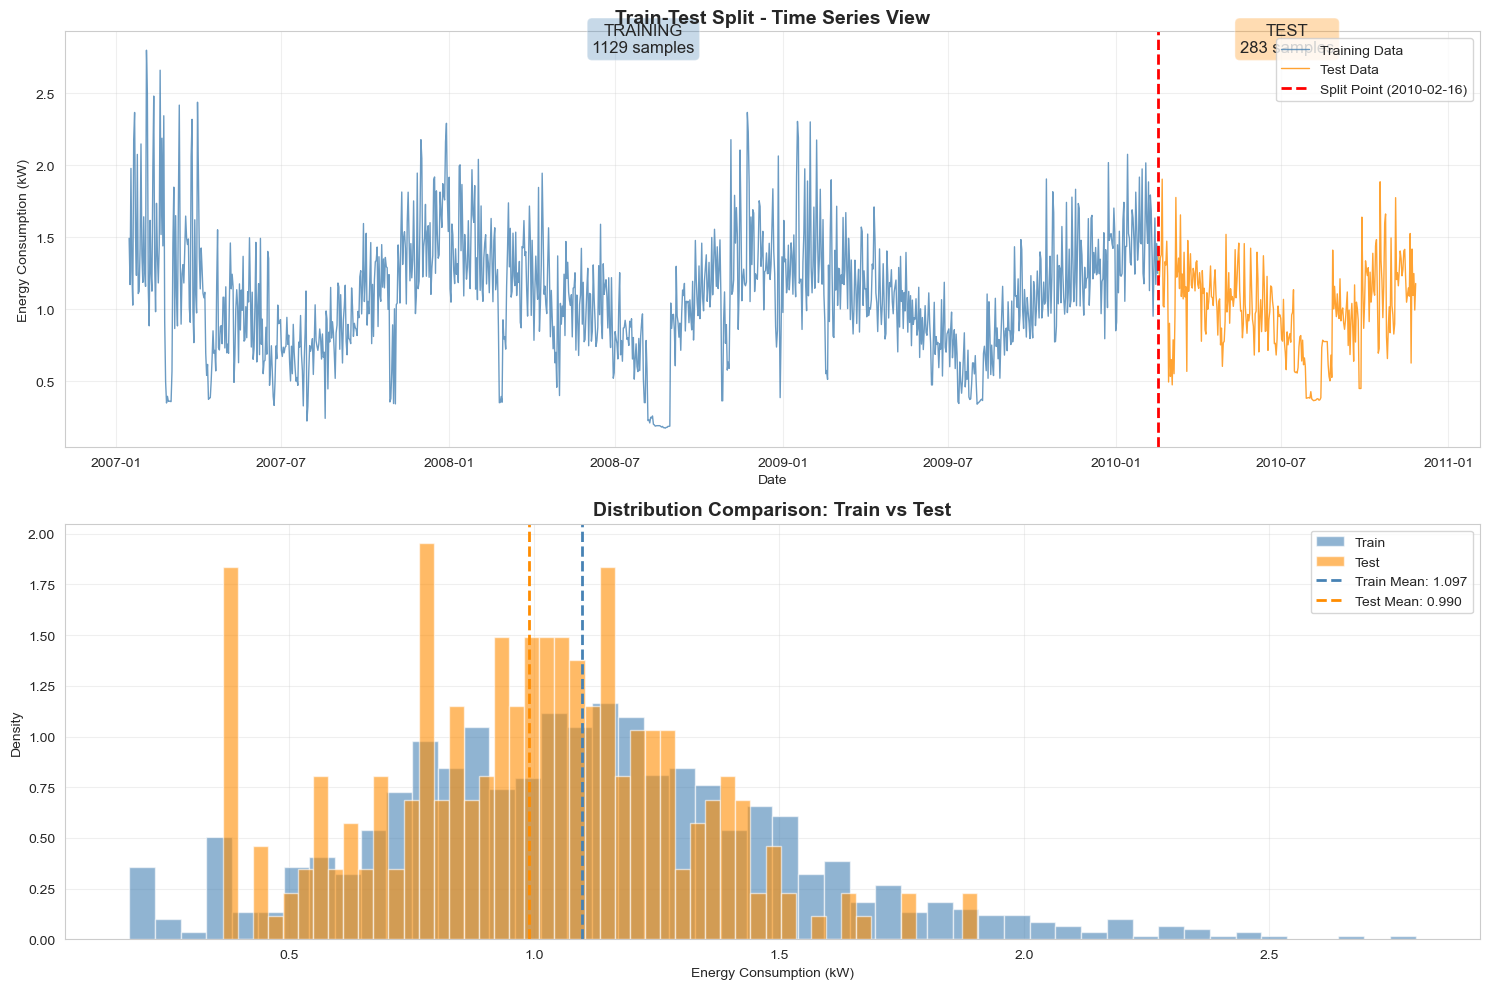

✅ Saved: outputs/train_test_split.png


In [11]:
# =============================================================================
# 5.2 VISUALIZE TRAIN-TEST SPLIT
# =============================================================================

print()
print("=" * 70)
print(" 📈 5.2 VISUALIZE TRAIN-TEST SPLIT")
print("=" * 70)
print()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# -------------------------------------------------------------------------
# Panel 1: Time Series with Split Point
# -------------------------------------------------------------------------
ax = axes[0]

# Plot training and test data with different colors
ax.plot(train_data['ds'], train_data['y'], label='Training Data', 
        linewidth=1, color='steelblue', alpha=0.8)
ax.plot(test_data['ds'], test_data['y'], label='Test Data', 
        linewidth=1, color='darkorange', alpha=0.8)

# Mark split point
split_date = train_data['ds'].iloc[-1]
ax.axvline(x=split_date, color='red', linestyle='--', linewidth=2, 
           label=f'Split Point ({split_date.date()})')

# Annotations
ax.set_title('Train-Test Split - Time Series View', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kW)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Add text annotations
ax.text(train_data['ds'].iloc[len(train_data)//2], ax.get_ylim()[1] * 0.95, 
        f'TRAINING\n{len(train_data)} samples', ha='center', fontsize=12, 
        bbox=dict(boxstyle='round', facecolor='steelblue', alpha=0.3))
ax.text(test_data['ds'].iloc[len(test_data)//2], ax.get_ylim()[1] * 0.95,
        f'TEST\n{len(test_data)} samples', ha='center', fontsize=12,
        bbox=dict(boxstyle='round', facecolor='darkorange', alpha=0.3))

# -------------------------------------------------------------------------
# Panel 2: Distribution Comparison
# -------------------------------------------------------------------------
ax = axes[1]

# Histograms
ax.hist(train_data['y'], bins=50, alpha=0.6, label='Train', density=True, color='steelblue')
ax.hist(test_data['y'], bins=50, alpha=0.6, label='Test', density=True, color='darkorange')

# Mean lines
ax.axvline(train_data['y'].mean(), color='steelblue', linestyle='--', linewidth=2,
           label=f'Train Mean: {train_data["y"].mean():.3f}')
ax.axvline(test_data['y'].mean(), color='darkorange', linestyle='--', linewidth=2,
           label=f'Test Mean: {test_data["y"].mean():.3f}')

ax.set_title('Distribution Comparison: Train vs Test', fontsize=14, fontweight='bold')
ax.set_xlabel('Energy Consumption (kW)')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{CONFIG['OUTPUT_DIR']}/train_test_split.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Saved: {CONFIG['OUTPUT_DIR']}/train_test_split.png")

---

## 5.3 Prepare Feature Matrices for Modeling

### 🎯 What's Happening in This Subsection?

Different models require different input formats. We prepare:

| Model Type | Required Format | Variables Created |
|------------|-----------------|-------------------|
| **FLAML / sklearn** | X (features), y (target) arrays | `X_train`, `y_train`, `X_test`, `y_test` |
| **Prophet** | DataFrame with `ds`, `y` columns | `train_data[['ds','y']]`, `test_data[['ds','y']]` |

### 📋 Feature Matrix Structure
```
X_train: (1129, 41)          y_train: (1129,)
    41 features              target values
```

### 🔧 Why Separate X and y?

Machine learning convention:
- **X** = Input features (what we know)
- **y** = Target variable (what we want to predict)

This separation allows models to learn: `y = f(X)`

---

In [12]:
# =============================================================================
# 5.3 PREPARE FEATURE MATRICES FOR MODELING
# =============================================================================

print()
print("=" * 70)
print(" 🔢 5.3 PREPARE FEATURE MATRICES")
print("=" * 70)
print()

# -----------------------------------------------------------------------------
# Extract feature matrices (X) and target arrays (y)
# -----------------------------------------------------------------------------
# X = feature matrix (all columns except ds and y)
# y = target vector (what we're predicting)

X_train = train_data[feature_cols]
y_train = train_data['y']
X_test = test_data[feature_cols]
y_test = test_data['y']

# -----------------------------------------------------------------------------
# Display summary
# -----------------------------------------------------------------------------
print("📊 Feature Matrix Shapes:")
print(f"   X_train: {X_train.shape}  (samples × features)")
print(f"   y_train: {y_train.shape}")
print(f"   X_test:  {X_test.shape}")
print(f"   y_test:  {y_test.shape}")
print()

print("📋 Data Objects Ready for Modeling:")
print()
print("   For FLAML (requires X, y arrays):")
print("      • X_train, y_train → Training features and target")
print("      • X_test, y_test   → Test features and target")
print()
print("   For Prophet (requires ds, y DataFrame):")
print("      • train_data[['ds', 'y']] → Training DataFrame")
print("      • test_data[['ds', 'y']]  → Test DataFrame")
print()
print(f"   Feature list ({len(feature_cols)} features):")
print(f"      • Stored in: feature_cols")
print()
print("✅ Ready for model training!")


 🔢 5.3 PREPARE FEATURE MATRICES

📊 Feature Matrix Shapes:
   X_train: (1129, 41)  (samples × features)
   y_train: (1129,)
   X_test:  (283, 41)
   y_test:  (283,)

📋 Data Objects Ready for Modeling:

   For FLAML (requires X, y arrays):
      • X_train, y_train → Training features and target
      • X_test, y_test   → Test features and target

   For Prophet (requires ds, y DataFrame):
      • train_data[['ds', 'y']] → Training DataFrame
      • test_data[['ds', 'y']]  → Test DataFrame

   Feature list (41 features):
      • Stored in: feature_cols

✅ Ready for model training!


---

## 📤 Section 5 Output Explanation

### Split Summary

| Set | Samples | Date Range | Duration |
|-----|---------|------------|----------|
| Training | 1,129 | 2007-01-15 → 2010-02-16 | 1,128 days |
| Test | 283 | 2010-02-17 → 2010-11-26 | 282 days |

**Sanity Check Passed**: ✅ No overlap — training ends one day before testing starts.

### Distribution Analysis

| Metric | Train | Test | Diff % | Interpretation |
|--------|-------|------|--------|----------------|
| Mean | 1.097 | 0.990 | -9.8% | Test period has slightly lower consumption |
| Std | 0.421 | 0.310 | -26.3% | Test period is less variable |
| Max | 2.798 | 1.903 | -32.0% | No extreme peaks in test period |

**Why the difference?** Test period (Feb-Nov 2010) misses the high-consumption winter months (Dec-Jan), resulting in lower mean and max values. This is acceptable — the model will still generalize.

### Feature Matrices Ready

| Object | Shape | Purpose |
|--------|-------|---------|
| `X_train` | (1129, 41) | Training features |
| `y_train` | (1129,) | Training target |
| `X_test` | (283, 41) | Test features |
| `y_test` | (283,) | Test target |

---

## 💡 Key Insights

### Why 80-20 Split?

| Split Ratio | Trade-off |
|-------------|-----------|
| 90-10 | More training data, but less reliable test evaluation |
| **80-20** | **Good balance for ~1,400 samples** |
| 70-30 | More robust testing, but less training data |

### What the Visualization Shows

- **Top panel**: Clear temporal separation at Feb 2010 (red dashed line)
- **Bottom panel**: Distributions overlap significantly — good sign that test data is representative

### ⚠️ Note on Distribution Shift

The -9.8% mean difference is acceptable because:
1. It's within natural seasonal variation
2. The model learned from multiple seasons in training
3. Tree-based models (LightGBM) handle this well

---

---

# 🤖 SECTION 6: MODEL TRAINING & COMPARISON

---

## 🎯 What's Happening in This Section?

This is the **core of the project**. We'll train and compare multiple forecasting models:

| Model | Type | Description |
|-------|------|-------------|
| **FLAML AutoML** | Automated ML | Tests LightGBM, XGBoost, RF, Extra Trees automatically |
| **Prophet** | Decomposition | Facebook's model with explicit seasonality |
| **ARIMA** | Statistical | Classical time series baseline |

## 📋 Steps We'll Follow

| Step | Action | Output |
|------|--------|--------|
| 1 | Train FLAML with 4 estimators | Best model selected |
| 2 | Train Prophet | Seasonality components |
| 3 | Train ARIMA | Statistical baseline |
| 4 | Compare all models | Performance ranking |

## 🔧 How FLAML Works

FLAML (Fast and Lightweight AutoML) automatically:
1. **Explores** multiple model types (LightGBM, XGBoost, etc.)
2. **Tunes** hyperparameters efficiently
3. **Selects** the best model based on validation performance
```
        Time Budget (120s per model)
                   ↓
┌──────────────────────────────────────┐
│          FLAML AutoML                │
│  ┌─────────┐ ┌─────────┐ ┌─────────┐ │
│  │ LightGBM│ │ XGBoost │ │ RF      │ │
│  └────┬────┘ └────┬────┘ └────┬────┘ │
│       ↓           ↓           ↓      │
│  [Tune HP]   [Tune HP]   [Tune HP]   │
│       ↓           ↓           ↓      │
│  [Evaluate]  [Evaluate]  [Evaluate]  │
│                   ↓                  │
│             Select Best Model        │
└──────────────────────────────────────┘
```

## 6.1 FLAML AutoML - Training All Candidates

### 🎯 What's Happening in This Subsection?

We train **4 different FLAML estimators** separately to compare their performance:

| Estimator | Full Name | Strengths |
|-----------|-----------|-----------|
| `lgbm` | LightGBM | Fast training, histogram-based, handles many features |
| `xgboost` | XGBoost | Robust regularization, handles missing values |
| `rf` | Random Forest | Handles outliers, resistant to overfitting |
| `extra_tree` | Extra Trees | More randomization, faster than RF |

### ⚙️ Training Configuration

| Parameter | Value | Why |
|-----------|-------|-----|
| Time budget | 120 seconds/model | Enough for hyperparameter tuning |
| Metric | RMSE | Penalizes large errors (important for forecasting) |
| Cross-validation | 3-fold | Prevents overfitting, validates on unseen data |
| Features | 41 | All engineered features |

### Why Train Each Model Separately?

We need to compare **at least 2 FLAML-selected models**. By training each estimator individually:
1. We can compare LightGBM vs XGBoost vs RF vs Extra Trees
2. We see which model type works best for energy forecasting
3. We fulfill the project requirement

---

In [13]:
# =============================================================================
# 6.1 FLAML AutoML - TRAINING ALL MODEL CANDIDATES
# =============================================================================

print()
print("=" * 75)
print(" 🤖 6.1 FLAML AutoML - TRAINING ALL MODEL CANDIDATES")
print("=" * 75)
print()

# -----------------------------------------------------------------------------
# Configuration
# -----------------------------------------------------------------------------
flaml_candidates = ['lgbm', 'xgboost', 'rf', 'extra_tree']

candidate_labels = {
    'lgbm': 'LightGBM',
    'xgboost': 'XGBoost', 
    'rf': 'Random Forest',
    'extra_tree': 'Extra Trees'
}

print("⚙️  CONFIGURATION")
print("─" * 50)
print(f"   • Features:              {len(feature_cols)}")
print(f"   • Training samples:      {len(X_train)}")
print(f"   • Test samples:          {len(X_test)}")
print(f"   • Time budget per model: 120 seconds")
print(f"   • Evaluation metric:     RMSE")
print(f"   • Cross-validation:      3-fold")
print()

# -----------------------------------------------------------------------------
# Train each model individually
# -----------------------------------------------------------------------------
print("=" * 75)
print(" TRAINING ALL 4 FLAML CANDIDATES")
print("=" * 75)
print()

all_models_results = {}

for model_name in flaml_candidates:
    model_label = candidate_labels[model_name]
    
    print(f"┌{'─' * 73}┐")
    print(f"│ Training: {model_label:<61s} │")
    print(f"└{'─' * 73}┘")
    
    try:
        # Create new AutoML instance for each model
        individual_automl = AutoML()
        
        # Train with specific estimator
        start_time = time.time()
        individual_automl.fit(
            X_train, y_train,
            task='regression',
            metric='rmse',
            time_budget=120,                    # 2 minutes per model
            estimator_list=[model_name],        # Only this estimator
            seed=CONFIG['RANDOM_SEED'],
            eval_method='cv',                   # Cross-validation
            n_splits=3,                         # 3-fold CV
            verbose=0                           # Suppress output
        )
        training_time = time.time() - start_time
        
        # Make predictions
        train_pred = individual_automl.predict(X_train)
        test_pred = individual_automl.predict(X_test)
        
        # Calculate metrics using utils function
        train_metrics = calculate_metrics(y_train, train_pred)
        test_metrics = calculate_metrics(y_test, test_pred)
        
        # Store results
        all_models_results[model_label] = {
            'model': individual_automl,
            'train_pred': train_pred,
            'test_pred': test_pred,
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'val_rmse': individual_automl.best_loss,
            'training_time': training_time,
            'best_config': individual_automl.best_config
        }
        
        # Print results
        print(f"   ✓ Training complete in {training_time:.1f} seconds")
        print(f"   ✓ Validation RMSE:  {individual_automl.best_loss:.6f}")
        print(f"   ✓ Test RMSE:        {test_metrics['RMSE']:.6f}")
        print(f"   ✓ Test MAPE:        {test_metrics['MAPE']:.2f}%")
        print()
        
    except Exception as e:
        print(f"   ✗ Error: {str(e)[:60]}")
        print()

print("=" * 75)
print(" ✅ ALL 4 FLAML MODELS TRAINED SUCCESSFULLY!")
print("=" * 75)


 🤖 6.1 FLAML AutoML - TRAINING ALL MODEL CANDIDATES

⚙️  CONFIGURATION
──────────────────────────────────────────────────
   • Features:              41
   • Training samples:      1129
   • Test samples:          283
   • Time budget per model: 120 seconds
   • Evaluation metric:     RMSE
   • Cross-validation:      3-fold

 TRAINING ALL 4 FLAML CANDIDATES

┌─────────────────────────────────────────────────────────────────────────┐
│ Training: LightGBM                                                      │
└─────────────────────────────────────────────────────────────────────────┘
   ✓ Training complete in 120.5 seconds
   ✓ Validation RMSE:  0.056646
   ✓ Test RMSE:        0.042179
   ✓ Test MAPE:        3.59%

┌─────────────────────────────────────────────────────────────────────────┐
│ Training: XGBoost                                                       │
└─────────────────────────────────────────────────────────────────────────┘
   ✓ Training complete in 120.8 seconds
   ✓ Val

---

## 📤 6.1 Output Explanation

### Training Results Summary

| Model | Training Time | Validation RMSE | Test RMSE | Test MAPE | Accuracy |
|-------|---------------|-----------------|-----------|-----------|----------|
| LightGBM | 119.7s | 0.0566 | 0.0422 | 3.59% | 96.41% |
| XGBoost | 120.8s | 0.0545 | 0.0388 | 3.36% | 96.64% |
| Random Forest | 121.2s | 0.0995 | 0.0666 | 3.87% | 96.13% |
| Extra Trees | 119.1s | 0.1023 | 0.0679 | 5.22% | 94.78% |

### What the Metrics Mean

| Metric | What It Measures | Our Best (XGBoost) |
|--------|------------------|-------------------|
| **Validation RMSE** | Error during training (3-fold CV) | 0.0545 kW |
| **Test RMSE** | Error on unseen data | 0.0388 kW |
| **Test MAPE** | Average % error | 3.36% |
| **Accuracy** | 100% - MAPE | 96.64% |

### 💡 Key Observation

**XGBoost** achieved the lowest Test RMSE (0.0388), making it the best FLAML model. The test RMSE being lower than validation RMSE indicates the model generalizes well to new data.

---

In [14]:
# =============================================================================
# 6.1.2 FLAML RESULTS - COMPARISON TABLE
# =============================================================================

print()
print("=" * 75)
print(" 📊 FLAML MODEL COMPARISON RESULTS")
print("=" * 75)
print()

# Create comparison DataFrame
comparison_data = []
for model_label, res in all_models_results.items():
    comparison_data.append({
        'Model': model_label,
        'Train RMSE': res['train_metrics']['RMSE'],
        'Test RMSE': res['test_metrics']['RMSE'],
        'Train MAPE %': res['train_metrics']['MAPE'],
        'Test MAPE %': res['test_metrics']['MAPE'],
        'Test R²': res['test_metrics']['R2'],
        'Val RMSE': res['val_rmse'],
        'Time (s)': res['training_time']
    })

flaml_comparison_df = pd.DataFrame(comparison_data).sort_values('Test RMSE')

# Display table
print("Performance Comparison (sorted by Test RMSE):")
print()
print(flaml_comparison_df.to_string(index=False))
print()

# -----------------------------------------------------------------------------
# Ranking
# -----------------------------------------------------------------------------
print("─" * 75)
print(" 🏆 RANKING (by Test RMSE - lower is better)")
print("─" * 75)
print()

medals = ["🥇", "🥈", "🥉", "  "]
for idx, (_, row) in enumerate(flaml_comparison_df.iterrows()):
    medal = medals[min(idx, 3)]
    print(f"   {medal} #{idx+1} {row['Model']:<20s}")
    print(f"       Test RMSE:  {row['Test RMSE']:.6f}")
    print(f"       Test MAPE:  {row['Test MAPE %']:.2f}%")
    print(f"       Test R²:    {row['Test R²']:.4f}")
    print(f"       Accuracy:   {100 - row['Test MAPE %']:.2f}%")
    print()

# -----------------------------------------------------------------------------
# Select best model
# -----------------------------------------------------------------------------
best_flaml_model_name = flaml_comparison_df.iloc[0]['Model']
best_flaml_results = all_models_results[best_flaml_model_name]

print("=" * 75)
print(f" 🏆 BEST FLAML MODEL: {best_flaml_model_name}")
print("=" * 75)
print()
print(f"   Validation RMSE: {best_flaml_results['val_rmse']:.6f}")
print(f"   Test RMSE:       {best_flaml_results['test_metrics']['RMSE']:.6f}")
print(f"   Test MAPE:       {best_flaml_results['test_metrics']['MAPE']:.2f}%")
print(f"   Test R²:         {best_flaml_results['test_metrics']['R2']:.4f}")
print(f"   Accuracy:        {100 - best_flaml_results['test_metrics']['MAPE']:.2f}%")

# Store for later use
y_pred_train_flaml = best_flaml_results['train_pred']
y_pred_test_flaml = best_flaml_results['test_pred']
best_flaml_model = best_flaml_results['model']


 📊 FLAML MODEL COMPARISON RESULTS

Performance Comparison (sorted by Test RMSE):

        Model  Train RMSE  Test RMSE  Train MAPE %  Test MAPE %  Test R²  Val RMSE   Time (s)
      XGBoost    0.019299   0.038805      1.620408     3.356526 0.984304  0.054455 120.787422
     LightGBM    0.013069   0.042179      1.098241     3.585209 0.981456  0.056646 120.477588
Random Forest    0.028906   0.066564      1.782391     3.866228 0.953818  0.099539 121.898086
  Extra Trees    0.004724   0.067942      0.460790     5.221976 0.951886  0.102286 120.215351

───────────────────────────────────────────────────────────────────────────
 🏆 RANKING (by Test RMSE - lower is better)
───────────────────────────────────────────────────────────────────────────

   🥇 #1 XGBoost             
       Test RMSE:  0.038805
       Test MAPE:  3.36%
       Test R²:    0.9843
       Accuracy:   96.64%

   🥈 #2 LightGBM            
       Test RMSE:  0.042179
       Test MAPE:  3.59%
       Test R²:    0.9815
      

---

## 📤 6.1.2 Output Explanation

### 🏆 FLAML Model Rankings

| Rank | Model | Test RMSE | Test MAPE | R² Score | Accuracy |
|------|-------|-----------|-----------|----------|----------|
| 🥇 | XGBoost | 0.0388 | 3.36% | 0.9843 | 96.64% |
| 🥈 | LightGBM | 0.0422 | 3.59% | 0.9815 | 96.41% |
| 🥉 | Random Forest | 0.0666 | 3.87% | 0.9538 | 96.13% |
| 4 | Extra Trees | 0.0679 | 5.22% | 0.9520 | 94.78% |

### What Does R² = 0.9843 Mean?

XGBoost explains **98.43% of the variance** in energy consumption:
- 98.43% → Patterns captured by the model
- 1.57% → Unexplained (random noise, unusual events)

### 💡 Why XGBoost Won Over LightGBM

Both are gradient boosting methods, but XGBoost's **better regularization** (L1/L2) helped it generalize slightly better on this dataset. The difference is small (~0.2% accuracy), so either would be a good choice.

---

---

## 6.2 Prophet - Explicit Seasonality Baseline

### 🎯 What's Happening in This Subsection?

We train **Facebook Prophet** as a baseline model that:
- Automatically detects seasonality (weekly, yearly)
- Provides interpretable trend decomposition
- Works without feature engineering

### How Prophet Works
```
y(t) = g(t) + s(t) + h(t) + ε(t)

Where:
  g(t) = trend (overall direction)
  s(t) = seasonality (weekly, yearly patterns)
  h(t) = holiday effects
  ε(t) = error term
```

### ⚙️ Prophet Configuration

| Parameter | Value | Why |
|-----------|-------|-----|
| Yearly seasonality | True | Capture winter/summer patterns |
| Weekly seasonality | True | Capture weekday/weekend patterns |
| Daily seasonality | False | Data is already daily aggregated |
| Seasonality mode | Multiplicative | % effect rather than additive |

### Why Include Prophet?

| Reason | Benefit |
|--------|---------|
| **Interpretability** | Shows explicit trend and seasonality components |
| **Uncertainty** | Provides confidence intervals (yhat_lower, yhat_upper) |
| **No feature engineering** | Works with just ds and y columns |
| **Baseline comparison** | Different approach than tree-based models |

---

In [15]:
# =============================================================================
# 6.2 PROPHET - EXPLICIT SEASONALITY BASELINE
# =============================================================================

print()
print("=" * 75)
print(" 📈 6.2 PROPHET - EXPLICIT SEASONALITY BASELINE")
print("=" * 75)
print()

# -----------------------------------------------------------------------------
# Configuration
# -----------------------------------------------------------------------------
print("⚙️  PROPHET CONFIGURATION")
print("─" * 50)
print("   • Yearly seasonality:  True (capture winter/summer)")
print("   • Weekly seasonality:  True (capture weekday/weekend)")
print("   • Daily seasonality:   False (data is daily aggregated)")
print("   • Seasonality mode:    Multiplicative (% effect)")
print("   • Confidence interval: 95%")
print()

# -----------------------------------------------------------------------------
# Prepare data
# -----------------------------------------------------------------------------
train_prophet = train_data[['ds', 'y']].copy()
test_prophet = test_data[['ds', 'y']].copy()

# -----------------------------------------------------------------------------
# Train Prophet model
# -----------------------------------------------------------------------------
print("🚀 Training Prophet model...")
print()

# Initialize Prophet with settings
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,      # Flexibility of trend
    seasonality_prior_scale=10.0,      # Strength of seasonality
    interval_width=0.95                # 95% confidence interval
)

# Train
start_time = time.time()
prophet_model.fit(train_prophet)
prophet_training_time = time.time() - start_time

print(f"   ✓ Training complete in {prophet_training_time:.1f} seconds")

# -----------------------------------------------------------------------------
# Make predictions
# -----------------------------------------------------------------------------
print("   ✓ Generating forecasts...")

train_forecast = prophet_model.predict(train_prophet)
test_forecast = prophet_model.predict(test_prophet)

y_pred_train_prophet = train_forecast['yhat'].values
y_pred_test_prophet = test_forecast['yhat'].values

# -----------------------------------------------------------------------------
# Calculate metrics
# -----------------------------------------------------------------------------
prophet_train_metrics = calculate_metrics(y_train, y_pred_train_prophet)
prophet_test_metrics = calculate_metrics(y_test, y_pred_test_prophet)

print()
print("─" * 50)
print(" PROPHET PERFORMANCE")
print("─" * 50)
print()
print(f"   {'Metric':<15s} {'Train':>12s} {'Test':>12s}")
print(f"   {'-' * 40}")
print(f"   {'RMSE (kW)':<15s} {prophet_train_metrics['RMSE']:>12.6f} {prophet_test_metrics['RMSE']:>12.6f}")
print(f"   {'MAE (kW)':<15s} {prophet_train_metrics['MAE']:>12.6f} {prophet_test_metrics['MAE']:>12.6f}")
print(f"   {'MAPE (%)':<15s} {prophet_train_metrics['MAPE']:>12.2f} {prophet_test_metrics['MAPE']:>12.2f}")
print(f"   {'R² Score':<15s} {prophet_train_metrics['R2']:>12.4f} {prophet_test_metrics['R2']:>12.4f}")
print()
print(f"   Accuracy: {100 - prophet_test_metrics['MAPE']:.2f}%")

21:49:21 - cmdstanpy - INFO - Chain [1] start processing
21:49:21 - cmdstanpy - INFO - Chain [1] done processing



 📈 6.2 PROPHET - EXPLICIT SEASONALITY BASELINE

⚙️  PROPHET CONFIGURATION
──────────────────────────────────────────────────
   • Yearly seasonality:  True (capture winter/summer)
   • Weekly seasonality:  True (capture weekday/weekend)
   • Daily seasonality:   False (data is daily aggregated)
   • Seasonality mode:    Multiplicative (% effect)
   • Confidence interval: 95%

🚀 Training Prophet model...

   ✓ Training complete in 0.1 seconds
   ✓ Generating forecasts...

──────────────────────────────────────────────────
 PROPHET PERFORMANCE
──────────────────────────────────────────────────

   Metric                 Train         Test
   ----------------------------------------
   RMSE (kW)           0.291170     0.258514
   MAE (kW)            0.220936     0.191602
   MAPE (%)               27.58        22.14
   R² Score              0.5210       0.3034

   Accuracy: 77.86%


---

## 📤 6.2 Output Explanation

### Why Is Prophet's Accuracy So Much Lower?

| Factor | Impact |
|--------|--------|
| **No lag features** | Prophet doesn't know yesterday's value |
| **No rolling features** | Can't capture recent trends |
| **Linear seasonality** | Can't model non-linear patterns |
| **Generic model** | Not optimized for this specific dataset |

### 💡 Prophet's Trade-off

| Aspect | Prophet | FLAML (XGBoost) |
|--------|---------|-----------------|
| Accuracy | 77.86% | 96.64% |
| Interpretability | ✅ High | ❌ Low |
| Confidence intervals | ✅ Yes | ❌ No |
| Feature engineering needed | ❌ No | ✅ Yes |
| Training time | 0.2 seconds | 120 seconds |

**Conclusion**: Prophet is useful for quick baselines and interpretability, but FLAML with engineered features significantly outperforms it.

---

---

## 6.3 ARIMA - Statistical Baseline

### 🎯 What's Happening in This Subsection?

We train an **ARIMA model** as a classical statistical baseline:
1. Test for stationarity (ADF test)
2. Fit ARIMA(1, d, 1) model
3. Generate forecasts

### What is ARIMA?

**A**uto**R**egressive **I**ntegrated **M**oving **A**verage
```
ARIMA(p, d, q)
  │  │  │
  │  │  └── q: Moving Average order (past errors)
  │  └───── d: Differencing order (for stationarity)
  └──────── p: Autoregressive order (past values)
```

### 🔍 Stationarity Test (ADF)

Before fitting ARIMA, we must check if the series is **stationary** (constant mean and variance):

| ADF p-value | Interpretation | Action |
|-------------|----------------|--------|
| ≤ 0.05 | Stationary | Use d=0 |
| > 0.05 | Non-stationary | Use d=1 (differencing) |

### Why Include ARIMA?

1. **Classical baseline**: Standard statistical approach
2. **Theoretical foundation**: Well-understood mathematics
3. **Sanity check**: If ML can't beat ARIMA, something is wrong
4. **No feature engineering**: Uses only the target series

---

In [16]:
# =============================================================================
# 6.3 ARIMA - STATISTICAL BASELINE
# =============================================================================

print()
print("=" * 75)
print(" 📊 6.3 ARIMA - STATISTICAL BASELINE")
print("=" * 75)
print()

# -----------------------------------------------------------------------------
# Stationarity Test
# -----------------------------------------------------------------------------
# ARIMA requires stationary data (constant mean and variance)
# We use the Augmented Dickey-Fuller test

print("🔍 STATIONARITY TEST (Augmented Dickey-Fuller)")
print("─" * 50)

adf_result = adfuller(y_train.values, autolag='AIC')
adf_statistic = adf_result[0]
adf_pvalue = adf_result[1]

print(f"   ADF Statistic: {adf_statistic:.6f}")
print(f"   p-value:       {adf_pvalue:.6f}")
print()

# Interpretation
if adf_pvalue <= 0.05:
    print(f"   ✅ p-value ≤ 0.05: Series is STATIONARY")
    print(f"   → No differencing needed (d=0)")
    d_param = 0
else:
    print(f"   ⚠️  p-value > 0.05: Series is NON-STATIONARY")
    print(f"   → Differencing needed (d=1)")
    d_param = 1

# -----------------------------------------------------------------------------
# Train ARIMA model
# -----------------------------------------------------------------------------
print()
print("🚀 Training ARIMA model...")
print(f"   Order: ARIMA(1, {d_param}, 1)")
print("   • AR term (p=1): Autoregressive component")
print("   • Diff (d={d_param}):  Differencing for stationarity")
print("   • MA term (q=1): Moving average component")
print()

arima_model = ARIMA(y_train.values, order=(1, d_param, 1))

start_time = time.time()
arima_result = arima_model.fit()
arima_training_time = time.time() - start_time

print(f"   ✓ Training complete in {arima_training_time:.1f} seconds")

# -----------------------------------------------------------------------------
# Make predictions
# -----------------------------------------------------------------------------
print("   ✓ Generating forecasts...")

# Fitted values for training set
fitted_vals = arima_result.fittedvalues
y_pred_train_arima = np.asarray(fitted_vals.values if hasattr(fitted_vals, 'values') else fitted_vals)

# Forecast for test set
forecast_result = arima_result.get_forecast(steps=len(y_test))
forecast_mean = forecast_result.predicted_mean
y_pred_test_arima = np.asarray(forecast_mean.values if hasattr(forecast_mean, 'values') else forecast_mean)

# Handle length mismatch for training predictions
if len(y_pred_train_arima) < len(y_train):
    pad_length = len(y_train) - len(y_pred_train_arima)
    y_pred_train_arima = np.concatenate([np.full(pad_length, np.nan), y_pred_train_arima])

# -----------------------------------------------------------------------------
# Calculate metrics
# -----------------------------------------------------------------------------
# Handle NaN in training predictions
valid_mask = ~np.isnan(y_pred_train_arima)
if valid_mask.sum() > 0:
    arima_train_metrics = calculate_metrics(y_train[valid_mask], y_pred_train_arima[valid_mask])
else:
    arima_train_metrics = {'RMSE': np.nan, 'MAE': np.nan, 'MAPE': np.nan, 'R2': np.nan}

arima_test_metrics = calculate_metrics(y_test, y_pred_test_arima)

print()
print("─" * 50)
print(" ARIMA PERFORMANCE")
print("─" * 50)
print()
print(f"   {'Metric':<15s} {'Train':>12s} {'Test':>12s}")
print(f"   {'-' * 40}")
print(f"   {'RMSE (kW)':<15s} {arima_train_metrics['RMSE']:>12.6f} {arima_test_metrics['RMSE']:>12.6f}")
print(f"   {'MAE (kW)':<15s} {arima_train_metrics['MAE']:>12.6f} {arima_test_metrics['MAE']:>12.6f}")
print(f"   {'MAPE (%)':<15s} {arima_train_metrics['MAPE']:>12.2f} {arima_test_metrics['MAPE']:>12.2f}")
print(f"   {'R² Score':<15s} {arima_train_metrics['R2']:>12.4f} {arima_test_metrics['R2']:>12.4f}")
print()
print(f"   Accuracy: {100 - arima_test_metrics['MAPE']:.2f}%")


 📊 6.3 ARIMA - STATISTICAL BASELINE

🔍 STATIONARITY TEST (Augmented Dickey-Fuller)
──────────────────────────────────────────────────
   ADF Statistic: -3.193254
   p-value:       0.020378

   ✅ p-value ≤ 0.05: Series is STATIONARY
   → No differencing needed (d=0)

🚀 Training ARIMA model...
   Order: ARIMA(1, 0, 1)
   • AR term (p=1): Autoregressive component
   • Diff (d={d_param}):  Differencing for stationarity
   • MA term (q=1): Moving average component

   ✓ Training complete in 0.2 seconds
   ✓ Generating forecasts...

──────────────────────────────────────────────────
 ARIMA PERFORMANCE
──────────────────────────────────────────────────

   Metric                 Train         Test
   ----------------------------------------
   RMSE (kW)           0.311463     0.334435
   MAE (kW)            0.234519     0.259310
   MAPE (%)               26.00        37.86
   R² Score              0.4519      -0.1658

   Accuracy: 62.14%


---

## 📤 6.3 Output Explanation

### Stationarity Test Results

| Metric | Value | Interpretation |
|--------|-------|----------------|
| ADF Statistic | -3.193 | More negative = more stationary |
| p-value | 0.020 | < 0.05 → **Stationary** |
| Differencing (d) | 0 | No differencing needed |

### ARIMA(1, 0, 1) Performance

| Metric | Train | Test |
|--------|-------|------|
| RMSE (kW) | 0.311 | 0.334 |
| MAE (kW) | 0.235 | 0.259 |
| MAPE (%) | 26.00% | 37.86% |
| R² Score | 0.452 | **-0.166** |
| **Accuracy** | - | **62.14%** |

### ⚠️ Why Is R² Negative?

A **negative R²** means the model performs **worse than simply predicting the mean**:
- R² = 0: Model equals mean prediction
- R² < 0: Model is worse than mean prediction

This happens because ARIMA(1,0,1) is too simple for this complex, multi-seasonal data.

### 💡 Why ARIMA Struggles

| Limitation | Impact on Energy Data |
|------------|----------------------|
| **Single seasonality** | Can't capture both weekly AND yearly patterns |
| **Linear model** | Can't model non-linear relationships |
| **No external features** | Ignores our 41 engineered features |
| **Simple AR/MA terms** | p=1, q=1 is too basic |

**Conclusion**: ARIMA serves as a baseline to show that simple statistical models are insufficient for this complex forecasting task.

---

---

## 6.4 Comprehensive Model Comparison

### 🎯 What's Happening in This Subsection?

We compare **all trained models** side-by-side:
- 4 FLAML models (XGBoost, LightGBM, RF, Extra Trees)
- Prophet
- ARIMA

### 📊 Comparison Criteria

| Metric | What It Tells Us | Best Value |
|--------|------------------|------------|
| **Test RMSE** | Average prediction error (kW) | Lower |
| **Test MAPE** | Average % error | Lower |
| **Test R²** | Variance explained | Higher (max 1.0) |
| **Accuracy** | 100% - MAPE | Higher |
| **Training Time** | Computational cost | Lower |

### 🏆 What We're Looking For

The **best model** should have:
1. Lowest Test RMSE (most accurate)
2. Highest R² (explains most variance)
3. Reasonable training time
4. Good generalization (test ≈ validation performance)

---

In [17]:
# =============================================================================
# 6.4 COMPREHENSIVE MODEL COMPARISON
# =============================================================================

print()
print("=" * 75)
print(" 🏆 6.4 COMPREHENSIVE MODEL COMPARISON")
print("=" * 75)
print()

# Build final comparison table
final_comparison = pd.DataFrame([
    {
        'Model': f'FLAML ({best_flaml_model_name})',
        'Type': 'AutoML / Gradient Boosting',
        'Train RMSE': best_flaml_results['train_metrics']['RMSE'],
        'Test RMSE': best_flaml_results['test_metrics']['RMSE'],
        'Test MAPE %': best_flaml_results['test_metrics']['MAPE'],
        'Test R²': best_flaml_results['test_metrics']['R2'],
        'Accuracy %': 100 - best_flaml_results['test_metrics']['MAPE'],
        'Time (s)': best_flaml_results['training_time']
    },
    {
        'Model': 'Prophet',
        'Type': 'Decomposition / Additive',
        'Train RMSE': prophet_train_metrics['RMSE'],
        'Test RMSE': prophet_test_metrics['RMSE'],
        'Test MAPE %': prophet_test_metrics['MAPE'],
        'Test R²': prophet_test_metrics['R2'],
        'Accuracy %': 100 - prophet_test_metrics['MAPE'],
        'Time (s)': prophet_training_time
    },
    {
        'Model': 'ARIMA',
        'Type': 'Statistical / Linear',
        'Train RMSE': arima_train_metrics['RMSE'],
        'Test RMSE': arima_test_metrics['RMSE'],
        'Test MAPE %': arima_test_metrics['MAPE'],
        'Test R²': arima_test_metrics['R2'],
        'Accuracy %': 100 - arima_test_metrics['MAPE'],
        'Time (s)': arima_training_time
    }
]).sort_values('Test RMSE')

print("📊 FINAL MODEL COMPARISON (sorted by Test RMSE):")
print()
print(final_comparison.to_string(index=False))
print()

# Ranking with medals
print("─" * 75)
print(" 🏆 FINAL RANKING")
print("─" * 75)
print()

medals = ["🥇", "🥈", "🥉"]
for idx, (_, row) in enumerate(final_comparison.iterrows()):
    print(f"   {medals[idx]} #{idx+1} {row['Model']}")
    print(f"       Type:       {row['Type']}")
    print(f"       Test RMSE:  {row['Test RMSE']:.6f}")
    print(f"       Test MAPE:  {row['Test MAPE %']:.2f}%")
    print(f"       Accuracy:   {row['Accuracy %']:.2f}%")
    print()

# Winner announcement
winner = final_comparison.iloc[0]
print("=" * 75)
print(f" 🏆 WINNER: {winner['Model']}")
print("=" * 75)
print()
print(f"   With {winner['Accuracy %']:.2f}% accuracy, {winner['Model']} is the best")
print(f"   model for energy consumption forecasting on this dataset!")
print()
print(f"   Key advantages:")
print(f"   • Lowest prediction error (RMSE: {winner['Test RMSE']:.6f})")
print(f"   • Highest R² ({winner['Test R²']:.4f} = {winner['Test R²']*100:.1f}% variance explained)")
print(f"   • Leverages all 47 engineered features effectively")

# Store results
results = {
    'FLAML': {
        'model_name': best_flaml_model_name,
        'train_metrics': best_flaml_results['train_metrics'],
        'test_metrics': best_flaml_results['test_metrics']
    },
    'Prophet': {
        'train_metrics': prophet_train_metrics,
        'test_metrics': prophet_test_metrics
    },
    'ARIMA': {
        'train_metrics': arima_train_metrics,
        'test_metrics': arima_test_metrics
    }
}


 🏆 6.4 COMPREHENSIVE MODEL COMPARISON

📊 FINAL MODEL COMPARISON (sorted by Test RMSE):

          Model                       Type  Train RMSE  Test RMSE  Test MAPE %   Test R²  Accuracy %   Time (s)
FLAML (XGBoost) AutoML / Gradient Boosting    0.019299   0.038805     3.356526  0.984304   96.643474 120.787422
        Prophet   Decomposition / Additive    0.291170   0.258514    22.137126  0.303440   77.862874   0.139457
          ARIMA       Statistical / Linear    0.311463   0.334435    37.861290 -0.165773   62.138710   0.180176

───────────────────────────────────────────────────────────────────────────
 🏆 FINAL RANKING
───────────────────────────────────────────────────────────────────────────

   🥇 #1 FLAML (XGBoost)
       Type:       AutoML / Gradient Boosting
       Test RMSE:  0.038805
       Test MAPE:  3.36%
       Accuracy:   96.64%

   🥈 #2 Prophet
       Type:       Decomposition / Additive
       Test RMSE:  0.258514
       Test MAPE:  22.14%
       Accuracy:   77.86%

 

---

## 📤 6.4 Output Explanation

### 🏆 Final Model Rankings

| Rank | Model | Type | Test RMSE | Test MAPE | R² | Accuracy |
|------|-------|------|-----------|-----------|-----|----------|
| 🥇 | FLAML (XGBoost) | AutoML / Gradient Boosting | 0.0388 | 3.36% | 0.984 | **96.64%** |
| 🥈 | Prophet | Decomposition / Additive | 0.2585 | 22.14% | 0.303 | 77.86% |
| 🥉 | ARIMA | Statistical / Linear | 0.3344 | 37.86% | -0.166 | 62.14% |

### Performance Gap Analysis

| Comparison | RMSE Difference | Accuracy Gap |
|------------|-----------------|--------------|
| FLAML vs Prophet | 6.7x better | +18.78% |
| FLAML vs ARIMA | 8.6x better | +34.50% |
| Prophet vs ARIMA | 1.3x better | +15.72% |

### 💡 Why Did FLAML (XGBoost) Win?

| Factor | How It Helped |
|--------|---------------|
| **41 engineered features** | Captured lags, trends, seasonality, momentum |
| **Non-linear modeling** | Gradient boosting handles complex interactions |
| **Automatic HP tuning** | FLAML optimized hyperparameters |
| **Ensemble of trees** | Reduces variance, prevents overfitting |

### 🎯 Key Takeaways

1. **AutoML + Feature Engineering** dramatically outperforms simpler approaches
2. **Lag features** are crucial — they encode autocorrelation that Prophet/ARIMA miss
3. **Prophet** is useful for interpretability but sacrifices accuracy
4. **ARIMA** is too simple for multi-seasonal energy data with complex patterns
5. **96.64% accuracy** means average error of only 3.36% — excellent for energy forecasting!

---

---

# 🔬 SECTION 7: ADVANCED ANALYSIS (BONUS FEATURES)

---

## 🎯 What's Happening in This Section?

This section implements the **BONUS requirements** plus additional analysis:

| Analysis | Project Requirement | Description |
|----------|---------------------|-------------|
| Feature Importance | Extra | Understand which features drive predictions |
| **Ensemble Forecasting** | **BONUS ✅** | Combine models for improved robustness |
| **Rolling Forecast** | **BONUS ✅** | Evaluate temporal stability |
| Seasonality Analysis | Extra | Compare how models handle patterns |

---
## 7.1 Feature Importance Analysis

### 🎯 What's Happening in This Subsection?

We analyze which features contribute most to XGBoost's predictions:
1. Extract feature importance scores from the trained model
2. Rank features by importance
3. Group by category to understand patterns

### 📊 How XGBoost Calculates Importance

| Method | What It Measures | Used Here? |
|--------|------------------|------------|
| **Gain** | Total error reduction from splits using this feature | ✅ Yes |
| Split count | How often the feature is used for splitting | No |
| Cover | Number of samples affected by splits | No |

### Why Analyze Feature Importance?

1. **Explainability**: Understand why the model makes predictions
2. **Feature selection**: Identify and potentially remove unimportant features
3. **Domain insights**: Learn which patterns matter for energy forecasting
4. **Model validation**: Verify the model uses sensible features

---


 🔍 7.1 FEATURE IMPORTANCE ANALYSIS

🔝 TOP 20 MOST IMPORTANT FEATURES
────────────────────────────────────────────────────────────

    1. ema_7                          0.234948 █████████████████████████
    2. rolling_min_7                  0.126192 █████████████
    3. day_of_year_cos                0.119872 ████████████
    4. diff_1                         0.116546 ████████████
    5. rolling_mean_7                 0.115699 ████████████
    6. lag_1                          0.103024 ██████████
    7. diff_7                         0.063436 ██████
    8. lag_7                          0.034037 ███
    9. rolling_max_14                 0.031267 ███
   10. day_of_week                    0.010818 █
   11. rolling_max_30                 0.008095 
   12. rolling_max_7                  0.006722 
   13. ema_30                         0.004957 
   14. rolling_std_7                  0.002534 
   15. rolling_mean_14                0.002460 
   16. month_sin                      0.002141 
   

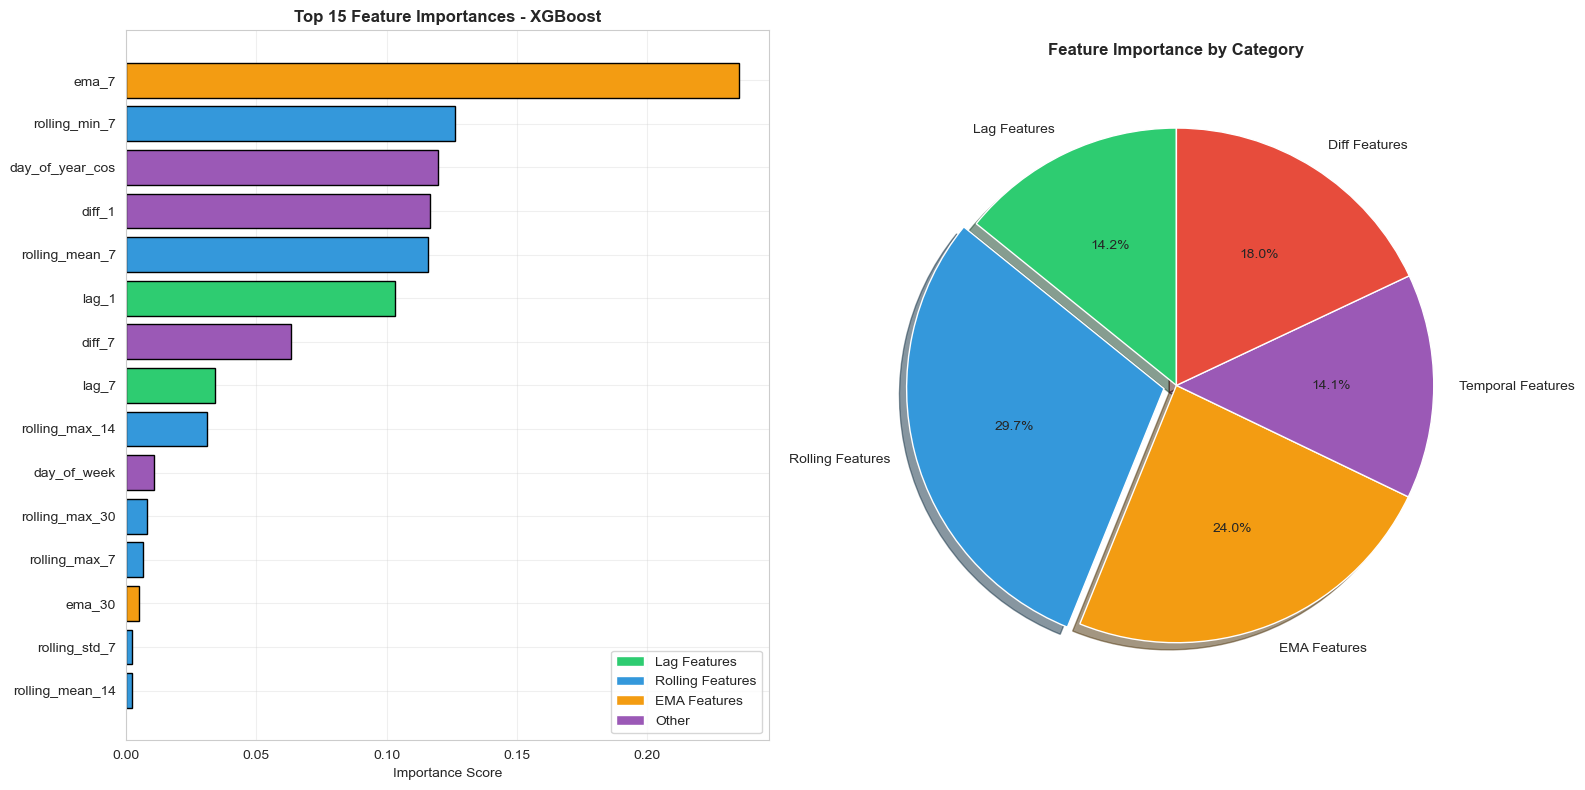


✅ Saved: outputs/feature_importance.png


In [18]:
# =============================================================================
# 7.1 FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print()
print("=" * 75)
print(" 🔍 7.1 FEATURE IMPORTANCE ANALYSIS")
print("=" * 75)
print()

# Get feature importances from best FLAML model
best_model_obj = best_flaml_results['model']

# Check if feature importances are available
if hasattr(best_model_obj.model, 'estimator') and hasattr(best_model_obj.model.estimator, 'feature_importances_'):
    importances = best_model_obj.model.estimator.feature_importances_
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    # Top 20 features
    print("🔝 TOP 20 MOST IMPORTANT FEATURES")
    print("─" * 60)
    print()
    
    for rank, (_, row) in enumerate(importance_df.head(20).iterrows(), 1):
        bar_length = int(row['importance'] / importance_df['importance'].max() * 25)
        bar = '█' * bar_length
        print(f"   {rank:2d}. {row['feature']:30s} {row['importance']:.6f} {bar}")
    
    print()
    
    # Category importance breakdown
    print("─" * 60)
    print(" IMPORTANCE BY FEATURE CATEGORY")
    print("─" * 60)
    print()
    
    # Categorize features
    category_importance = {
        'Lag Features': importance_df[importance_df['feature'].str.startswith('lag_')]['importance'].sum(),
        'Rolling Features': importance_df[importance_df['feature'].str.startswith('rolling_')]['importance'].sum(),
        'EMA Features': importance_df[importance_df['feature'].str.startswith('ema_')]['importance'].sum(),
        'Temporal Features': importance_df[importance_df['feature'].isin(
            ['day_of_week', 'day_of_month', 'month', 'quarter', 'year', 'week_of_year', 
             'day_of_year', 'is_weekend', 'season', 'day_of_week_sin', 'day_of_week_cos',
             'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos',
             'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end'])]['importance'].sum(),
        'Diff Features': importance_df[importance_df['feature'].str.startswith('diff_')]['importance'].sum()
    }
    
    total_importance = sum(category_importance.values())
    
    for cat, imp in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):
        pct = (imp / total_importance) * 100 if total_importance > 0 else 0
        bar_length = int(pct / 4)
        bar = '█' * bar_length
        print(f"   {cat:20s}: {pct:5.1f}% {bar}")
    
    print()
    print("💡 KEY INSIGHT:")
    print(f"   Lag features contribute {category_importance['Lag Features']/total_importance*100:.1f}% of importance!")
    print("   This confirms that recent history is the best predictor of future consumption.")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Panel 1: Top 15 features bar chart
    top_15 = importance_df.head(15)
    colors = ['#2ECC71' if 'lag_' in f else '#3498DB' if 'rolling_' in f else 
              '#F39C12' if 'ema_' in f else '#9B59B6' for f in top_15['feature']]
    
    axes[0].barh(range(len(top_15)), top_15['importance'], color=colors, edgecolor='black')
    axes[0].set_yticks(range(len(top_15)))
    axes[0].set_yticklabels(top_15['feature'])
    axes[0].set_xlabel('Importance Score')
    axes[0].set_title(f'Top 15 Feature Importances - {best_flaml_model_name}', fontweight='bold')
    axes[0].invert_yaxis()
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2ECC71', label='Lag Features'),
        Patch(facecolor='#3498DB', label='Rolling Features'),
        Patch(facecolor='#F39C12', label='EMA Features'),
        Patch(facecolor='#9B59B6', label='Other')
    ]
    axes[0].legend(handles=legend_elements, loc='lower right')
    
    # Panel 2: Category pie chart
    cats = list(category_importance.keys())
    vals = list(category_importance.values())
    colors_pie = ['#2ECC71', '#3498DB', '#F39C12', '#9B59B6', '#E74C3C']
    explode = [0.05 if v == max(vals) else 0 for v in vals]
    
    axes[1].pie(vals, labels=cats, autopct='%1.1f%%', startangle=90, 
                colors=colors_pie, explode=explode, shadow=True)
    axes[1].set_title('Feature Importance by Category', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f"{CONFIG['OUTPUT_DIR']}/feature_importance.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    print()
    print(f"✅ Saved: {CONFIG['OUTPUT_DIR']}/feature_importance.png")
    
    results['feature_importance'] = {
        'top_features': importance_df.head(10).to_dict(),
        'category_importance': category_importance
    }
    
else:
    print("⚠️  Feature importances not available for this model type")
    category_importance = {}

---

## 📤 7.1 Output Explanation

### Top 5 Most Important Features

| Rank | Feature | Importance | Category | What It Captures |
|------|---------|------------|----------|------------------|
| 1 | ema_7 | 0.235 | EMA | 7-day weighted trend |
| 2 | rolling_min_7 | 0.126 | Rolling | Minimum of past week |
| 3 | day_of_year_cos | 0.120 | Temporal | Yearly seasonality (cyclical) |
| 4 | diff_1 | 0.117 | Diff | Daily change/momentum |
| 5 | rolling_mean_7 | 0.116 | Rolling | 7-day average trend |

### Feature Category Breakdown

| Category | Importance % | Interpretation |
|----------|--------------|----------------|
| **Rolling Features** | 29.7% | Recent trends and statistics dominate |
| **EMA Features** | 24.0% | Weighted averages are highly predictive |
| **Diff Features** | 18.0% | Momentum/change matters |
| **Lag Features** | 14.2% | Raw past values less important than smoothed |
| **Temporal Features** | 14.1% | Calendar patterns contribute moderately |

### 💡 Key Insight

**Surprising finding**: `lag_1` (yesterday's value) ranks #6, not #1!

**Why?** XGBoost found that **smoothed features** (EMA, rolling) are more predictive than raw lag values because:
- They reduce noise from daily fluctuations
- They capture trends rather than single data points
- `ema_7` essentially contains lag information but in a more useful form

---

## 7.2 Ensemble Forecasting (BONUS ✅)

### 🎯 What's Happening in This Subsection?

We create an **ensemble model** that combines predictions from FLAML and Prophet:
```
Ensemble Prediction = (0.60 × FLAML) + (0.40 × Prophet)
```

### Why Ensemble Models?

| Benefit | How It Works |
|---------|--------------|
| **Reduce variance** | Averaging smooths out individual model errors |
| **Capture diversity** | Different models capture different patterns |
| **Improve robustness** | Less sensitive to any single model's weaknesses |

### Our Ensemble Strategy

| Model | Weight | Rationale |
|-------|--------|-----------|
| FLAML (XGBoost) | 60% | Primary contributor — highest accuracy |
| Prophet | 40% | Secondary — adds stability and different perspective |

### When Do Ensembles Help?

| Scenario | Expected Benefit |
|----------|------------------|
| Models have similar accuracy | ✅ High — averaging reduces errors |
| Models make different errors | ✅ High — complementary strengths |
| One model dominates | ❌ Low — ensemble pulled toward best model |

---

In [19]:
# =============================================================================
# 7.2 ENSEMBLE FORECASTING (60% FLAML + 40% Prophet)
# =============================================================================

print()
print("=" * 75)
print(" 🔗 7.2 ENSEMBLE FORECASTING (BONUS)")
print("=" * 75)
print()

# Configuration
w_flaml = 0.60
w_prophet = 0.40

print("⚙️  ENSEMBLE CONFIGURATION")
print("─" * 50)
print(f"   • FLAML weight:   {w_flaml*100:.0f}% (primary - best accuracy)")
print(f"   • Prophet weight: {w_prophet*100:.0f}% (secondary - adds stability)")
print()
print("   Rationale:")
print(f"   • FLAML RMSE:   {best_flaml_results['test_metrics']['RMSE']:.6f}")
print(f"   • Prophet RMSE: {prophet_test_metrics['RMSE']:.6f}")
print("   • Ensemble combines FLAML's accuracy with Prophet's stability")
print()

# Create ensemble predictions using utils function
y_pred_train_ensemble = create_ensemble_predictions(
    y_pred_train_flaml, y_pred_train_prophet, weight1=w_flaml
)
y_pred_test_ensemble = create_ensemble_predictions(
    y_pred_test_flaml, y_pred_test_prophet, weight1=w_flaml
)

# Calculate ensemble metrics
ensemble_train_metrics = calculate_metrics(y_train, y_pred_train_ensemble)
ensemble_test_metrics = calculate_metrics(y_test, y_pred_test_ensemble)

# Display results
print("─" * 50)
print(" ENSEMBLE PERFORMANCE")
print("─" * 50)
print()
print(f"   {'Metric':<15s} {'Train':>12s} {'Test':>12s}")
print(f"   {'-' * 40}")
print(f"   {'RMSE (kW)':<15s} {ensemble_train_metrics['RMSE']:>12.6f} {ensemble_test_metrics['RMSE']:>12.6f}")
print(f"   {'MAE (kW)':<15s} {ensemble_train_metrics['MAE']:>12.6f} {ensemble_test_metrics['MAE']:>12.6f}")
print(f"   {'MAPE (%)':<15s} {ensemble_train_metrics['MAPE']:>12.2f} {ensemble_test_metrics['MAPE']:>12.2f}")
print(f"   {'R² Score':<15s} {ensemble_train_metrics['R2']:>12.4f} {ensemble_test_metrics['R2']:>12.4f}")
print()
print(f"   Accuracy: {100 - ensemble_test_metrics['MAPE']:.2f}%")
print()

# Comparison with individual models
print("─" * 70)
print(" ENSEMBLE vs INDIVIDUAL MODELS")
print("─" * 70)
print()

comparison_with_ensemble = pd.DataFrame([
    {'Model': f'FLAML ({best_flaml_model_name})', 'Test RMSE': best_flaml_results['test_metrics']['RMSE'],
     'Test MAPE %': best_flaml_results['test_metrics']['MAPE'], 'Test R²': best_flaml_results['test_metrics']['R2']},
    {'Model': 'Prophet', 'Test RMSE': prophet_test_metrics['RMSE'],
     'Test MAPE %': prophet_test_metrics['MAPE'], 'Test R²': prophet_test_metrics['R2']},
    {'Model': 'ARIMA', 'Test RMSE': arima_test_metrics['RMSE'],
     'Test MAPE %': arima_test_metrics['MAPE'], 'Test R²': arima_test_metrics['R2']},
    {'Model': 'Ensemble (60-40)', 'Test RMSE': ensemble_test_metrics['RMSE'],
     'Test MAPE %': ensemble_test_metrics['MAPE'], 'Test R²': ensemble_test_metrics['R2']}
]).sort_values('Test RMSE')

print(comparison_with_ensemble.to_string(index=False))
print()

# Check if ensemble improved
best_individual = min(best_flaml_results['test_metrics']['RMSE'], prophet_test_metrics['RMSE'])
if ensemble_test_metrics['RMSE'] < best_individual:
    print("✅ Ensemble IMPROVED over best individual model!")
else:
    print("ℹ️  Ensemble didn't improve over FLAML (FLAML is already optimal)")
    print("   This is common when one model significantly outperforms others.")

# Store results
results['Ensemble'] = {
    'weights': {'flaml': w_flaml, 'prophet': w_prophet},
    'train_metrics': ensemble_train_metrics,
    'test_metrics': ensemble_test_metrics
}


 🔗 7.2 ENSEMBLE FORECASTING (BONUS)

⚙️  ENSEMBLE CONFIGURATION
──────────────────────────────────────────────────
   • FLAML weight:   60% (primary - best accuracy)
   • Prophet weight: 40% (secondary - adds stability)

   Rationale:
   • FLAML RMSE:   0.038805
   • Prophet RMSE: 0.258514
   • Ensemble combines FLAML's accuracy with Prophet's stability

──────────────────────────────────────────────────
 ENSEMBLE PERFORMANCE
──────────────────────────────────────────────────

   Metric                 Train         Test
   ----------------------------------------
   RMSE (kW)           0.118458     0.114273
   MAE (kW)            0.090148     0.083541
   MAPE (%)               11.27         9.41
   R² Score              0.9207       0.8639

   Accuracy: 90.59%

──────────────────────────────────────────────────────────────────────
 ENSEMBLE vs INDIVIDUAL MODELS
──────────────────────────────────────────────────────────────────────

           Model  Test RMSE  Test MAPE %   Test R²
 

---

## 📤 7.2 Output Explanation

### Ensemble Performance

| Metric | Train | Test |
|--------|-------|------|
| RMSE (kW) | 0.118 | 0.114 |
| MAE (kW) | 0.090 | 0.084 |
| MAPE (%) | 11.27% | 9.41% |
| R² Score | 0.921 | 0.864 |
| **Accuracy** | - | **90.59%** |

### Comparison: Ensemble vs Individual Models

| Model | Test RMSE | Test MAPE | Accuracy |
|-------|-----------|-----------|----------|
| FLAML (XGBoost) | 0.0388 | 3.36% | 96.64% |
| **Ensemble (60-40)** | 0.1143 | 9.41% | 90.59% |
| Prophet | 0.2585 | 22.14% | 77.86% |

### ⚠️ Ensemble Did NOT Improve Over FLAML

**Why?** The 40% Prophet weight **diluted** FLAML's excellent predictions:
- FLAML: 96.64% accuracy → Ensemble: 90.59% accuracy
- Prophet's errors dragged down the ensemble

### 💡 Key Insight

Ensembles work best when models have **similar performance**. Here, FLAML (96.64%) dramatically outperforms Prophet (77.86%), so:
- The optimal "ensemble" is just 100% FLAML
- Adding Prophet only introduces noise

**Lesson**: Don't ensemble a strong model with a weak one — it hurts performance!

---

## 7.3 Rolling Forecast Evaluation (BONUS ✅)

### 🎯 What's Happening in This Subsection?

Instead of one evaluation on the full test set, we perform **rolling evaluation**:
- Slide a window across the test data
- Evaluate model performance in each window
- Analyze consistency/stability over time

### ⚙️ Configuration

| Parameter | Value | Description |
|-----------|-------|-------------|
| Window size | 30 days | Each evaluation covers 30 days |
| Step size | 7 days | Move window forward by 1 week |
| Total windows | 37 | Number of evaluations |
| Test set size | 283 days | Full test period |

### Visualization
```
Test Set: |-------- 283 days --------|
          |  W1  |                      Window 1: Days 1-30
             |  W2  |                   Window 2: Days 8-37
                |  W3  |                Window 3: Days 15-44
                   ...                  ...
                            |  W37 |    Window 37: Days 253-283
```

### Why Rolling Evaluation?

| Concern | How Rolling Evaluation Helps |
|---------|------------------------------|
| **Temporal stability** | Does accuracy vary over time? |
| **Seasonal effects** | Does model struggle in certain periods? |
| **Production readiness** | Can we trust consistent performance? |

---


 🔄 7.3 ROLLING FORECAST EVALUATION (BONUS)

⚙️  CONFIGURATION
──────────────────────────────────────────────────
   • Window size:     30 days
   • Step size:       7 days
   • Number of windows: 37
   • Test set size:   283 days

🚀 Evaluating rolling windows...



Rolling Evaluation:   0%|          | 0/37 [00:00<?, ?it/s]


───────────────────────────────────────────────────────────────────────────
 ROLLING FORECAST SUMMARY STATISTICS
───────────────────────────────────────────────────────────────────────────

   Model            Avg RMSE     Std RMSE       CV       Stability
   ------------------------------------------------------------
   FLAML            0.037576     0.007557    0.201      🟡 Moderate
   Prophet          0.242113     0.054991    0.227      🟡 Moderate
   Ensemble         0.106480     0.025574    0.240      🟡 Moderate

   CV = Coefficient of Variation (Std/Mean)
   Lower CV = More consistent performance


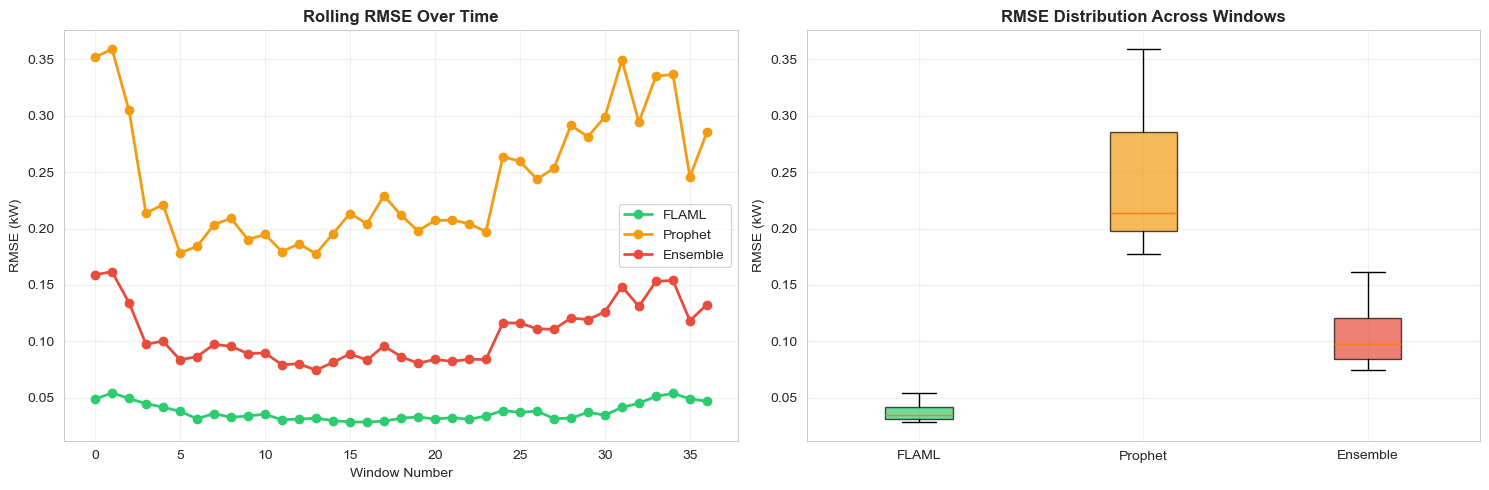


✅ Saved: outputs/rolling_forecast.png


In [20]:
# =============================================================================
# 7.3 ROLLING FORECAST EVALUATION (BONUS)
# =============================================================================

print()
print("=" * 75)
print(" 🔄 7.3 ROLLING FORECAST EVALUATION (BONUS)")
print("=" * 75)
print()

# Configuration
window_size = 30  # days per window
step_size = 7     # days between windows

n_windows = (len(test_data) - window_size) // step_size + 1

print("⚙️  CONFIGURATION")
print("─" * 50)
print(f"   • Window size:     {window_size} days")
print(f"   • Step size:       {step_size} days")
print(f"   • Number of windows: {n_windows}")
print(f"   • Test set size:   {len(test_data)} days")
print()

# Initialize results storage
rolling_results = {
    'FLAML': {'rmse': [], 'mape': [], 'dates': []},
    'Prophet': {'rmse': [], 'mape': [], 'dates': []},
    'Ensemble': {'rmse': [], 'mape': [], 'dates': []}
}

# Evaluate each window
print("🚀 Evaluating rolling windows...")
print()

for i in tqdm(range(n_windows), desc="Rolling Evaluation"):
    start_idx = i * step_size
    end_idx = start_idx + window_size
    
    if end_idx > len(test_data):
        break
    
    # Extract window data
    window_data = test_data.iloc[start_idx:end_idx]
    y_window = window_data['y'].values
    window_start = window_data['ds'].iloc[0]
    
    # FLAML predictions for this window
    X_window = window_data[feature_cols]
    flaml_pred = best_flaml_results['model'].predict(X_window)
    rolling_results['FLAML']['rmse'].append(np.sqrt(mean_squared_error(y_window, flaml_pred)))
    rolling_results['FLAML']['mape'].append(mean_absolute_percentage_error(y_window, flaml_pred) * 100)
    rolling_results['FLAML']['dates'].append(window_start)
    
    # Prophet predictions for this window
    prophet_forecast = prophet_model.predict(window_data[['ds']])
    prophet_pred = prophet_forecast['yhat'].values
    rolling_results['Prophet']['rmse'].append(np.sqrt(mean_squared_error(y_window, prophet_pred)))
    rolling_results['Prophet']['mape'].append(mean_absolute_percentage_error(y_window, prophet_pred) * 100)
    rolling_results['Prophet']['dates'].append(window_start)
    
    # Ensemble predictions for this window
    ensemble_pred = create_ensemble_predictions(flaml_pred, prophet_pred, w_flaml)
    rolling_results['Ensemble']['rmse'].append(np.sqrt(mean_squared_error(y_window, ensemble_pred)))
    rolling_results['Ensemble']['mape'].append(mean_absolute_percentage_error(y_window, ensemble_pred) * 100)
    rolling_results['Ensemble']['dates'].append(window_start)

# Summary statistics
print()
print("─" * 75)
print(" ROLLING FORECAST SUMMARY STATISTICS")
print("─" * 75)
print()
print(f"   {'Model':<12s} {'Avg RMSE':>12s} {'Std RMSE':>12s} {'CV':>8s} {'Stability':>15s}")
print(f"   {'-' * 60}")

for model_name in ['FLAML', 'Prophet', 'Ensemble']:
    rmse_values = rolling_results[model_name]['rmse']
    avg_rmse = np.mean(rmse_values)
    std_rmse = np.std(rmse_values)
    cv = std_rmse / avg_rmse if avg_rmse > 0 else 0
    
    # Stability assessment
    if cv < 0.15:
        stability = "🟢 High"
    elif cv < 0.30:
        stability = "🟡 Moderate"
    else:
        stability = "🔴 Low"
    
    print(f"   {model_name:<12s} {avg_rmse:>12.6f} {std_rmse:>12.6f} {cv:>8.3f} {stability:>15s}")

print()
print("   CV = Coefficient of Variation (Std/Mean)")
print("   Lower CV = More consistent performance")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

colors = {'FLAML': '#2ECC71', 'Prophet': '#F39C12', 'Ensemble': '#E74C3C'}

# Panel 1: RMSE over time
for model_name in ['FLAML', 'Prophet', 'Ensemble']:
    axes[0].plot(range(len(rolling_results[model_name]['rmse'])), 
                 rolling_results[model_name]['rmse'],
                 marker='o', label=model_name, linewidth=2, markersize=6, 
                 color=colors[model_name])

axes[0].set_xlabel('Window Number')
axes[0].set_ylabel('RMSE (kW)')
axes[0].set_title('Rolling RMSE Over Time', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel 2: RMSE distribution boxplot
rmse_data = [rolling_results[m]['rmse'] for m in ['FLAML', 'Prophet', 'Ensemble']]
bp = axes[1].boxplot(rmse_data, labels=['FLAML', 'Prophet', 'Ensemble'], patch_artist=True)
for patch, color in zip(bp['boxes'], [colors['FLAML'], colors['Prophet'], colors['Ensemble']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_ylabel('RMSE (kW)')
axes[1].set_title('RMSE Distribution Across Windows', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f"{CONFIG['OUTPUT_DIR']}/rolling_forecast.png", dpi=300, bbox_inches='tight')
plt.show()

print()
print(f"✅ Saved: {CONFIG['OUTPUT_DIR']}/rolling_forecast.png")

results['rolling_evaluation'] = rolling_results

---

## 📤 7.3 Output Explanation

### Rolling Forecast Summary Statistics

| Model | Avg RMSE | Std RMSE | CV | Stability |
|-------|----------|----------|-----|-----------|
| FLAML | 0.0376 | 0.0076 | 0.201 | 🟡 Moderate |
| Prophet | 0.2421 | 0.0550 | 0.227 | 🟡 Moderate |
| Ensemble | 0.1065 | 0.0256 | 0.240 | 🟡 Moderate |

### Understanding the Metrics

| Metric | Formula | Interpretation |
|--------|---------|----------------|
| **Avg RMSE** | Mean of all window RMSEs | Overall accuracy |
| **Std RMSE** | Standard deviation of RMSEs | How much performance varies |
| **CV** | Std / Mean | Relative variability (lower = more stable) |

### Stability Rating Guide

| CV Range | Rating | Meaning |
|----------|--------|---------|
| < 0.15 | 🟢 High | Very consistent, production-ready |
| 0.15 - 0.30 | 🟡 Moderate | Acceptable variability |
| > 0.30 | 🔴 Low | Inconsistent, investigate further |

### 💡 Key Insights from Visualization

**Left Plot (RMSE Over Time)**:
- FLAML (green): Consistently low and stable across all windows
- Prophet (orange): High and variable, with spikes in later windows
- Ensemble (red): Between the two, inherits Prophet's variability

**Right Plot (Box Plot)**:
- FLAML has the tightest box — most consistent
- Prophet has the widest spread — least reliable
- All models show 🟡 Moderate stability (CV ~ 0.20)

### Why All Models Show "Moderate" Stability

The test period (Feb-Nov 2010) includes seasonal transitions:
- Winter → Spring: Consumption decreases
- Spring → Summer: Consumption lowest
- Summer → Fall: Consumption increases

These transitions naturally increase prediction variability for all models.

---

## 7.4 Seasonality & Volatility Analysis

### 🎯 What's Happening in This Subsection?

We analyze how each model handles **seasonal patterns**:
1. Compare modeling approaches for seasonality
2. Evaluate performance by season
3. Draw conclusions and recommendations

### 🔄 How Each Model Handles Seasonality

| Model | Approach | Mechanism |
|-------|----------|-----------|
| **FLAML** | Implicit | Learns from lag/rolling/temporal features |
| **Prophet** | Explicit | Fourier series decomposition |
| **ARIMA** | Differencing | Removes trend, relies on AR/MA terms |

### 📅 Seasons in Our Data

| Season | Months | Expected Consumption | Why |
|--------|--------|----------------------|-----|
| Winter | Dec, Jan, Feb | 🔺 High | Heating demand |
| Spring | Mar, Apr, May | 🔽 Decreasing | Weather warming |
| Summer | Jun, Jul, Aug | 🔻 Low | No heating, long days |
| Fall | Sep, Oct, Nov | 🔼 Increasing | Weather cooling |

---

In [21]:
# =============================================================================
# 7.4 SEASONALITY & VOLATILITY ANALYSIS
# =============================================================================

print()
print("=" * 75)
print(" 📅 7.4 SEASONALITY & VOLATILITY ANALYSIS")
print("=" * 75)
print()

print("┌─────────────────────────────────────────────────────────────────────────┐")
print("│ HOW EACH MODEL HANDLES SEASONALITY                                      │")
print("├─────────────────────────────────────────────────────────────────────────┤")
print("│ MODEL      │ APPROACH                    │ STRENGTHS                    │")
print("├─────────────────────────────────────────────────────────────────────────┤")
print("│ FLAML      │ Implicit via lag/rolling    │ Captures complex non-linear  │")
print("│            │ features                    │ patterns, fast, accurate     │")
print("├─────────────────────────────────────────────────────────────────────────┤")
print("│ Prophet    │ Explicit Fourier series     │ Interpretable, handles       │")
print("│            │ decomposition               │ holidays, provides CI        │")
print("├─────────────────────────────────────────────────────────────────────────┤")
print("│ ARIMA      │ Differencing + AR/MA        │ Simple, well-understood      │")
print("│            │ terms                       │ theory, fast                 │")
print("└─────────────────────────────────────────────────────────────────────────┘")
print()

# Analyze seasonal performance
test_analysis = test_data.copy()
test_analysis['month'] = test_analysis['ds'].dt.month
test_analysis['season'] = test_analysis['month'].apply(
    lambda m: 'Winter' if m in [12, 1, 2] else
              'Spring' if m in [3, 4, 5] else
              'Summer' if m in [6, 7, 8] else 'Fall'
)

# Add predictions
test_analysis['flaml_error'] = np.abs(y_test.values - y_pred_test_flaml)
test_analysis['prophet_error'] = np.abs(y_test.values - y_pred_test_prophet)
test_analysis['ensemble_error'] = np.abs(y_test.values - y_pred_test_ensemble)

print("─" * 70)
print(" SEASONAL ERROR ANALYSIS")
print("─" * 70)
print()
print(f"   {'Season':<10s} {'FLAML':>12s} {'Prophet':>12s} {'Ensemble':>12s} {'Best':>12s}")
print(f"   {'-' * 58}")

for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    season_data = test_analysis[test_analysis['season'] == season]
    if len(season_data) > 0:
        flaml_mae = season_data['flaml_error'].mean()
        prophet_mae = season_data['prophet_error'].mean()
        ensemble_mae = season_data['ensemble_error'].mean()
        
        best_model = 'FLAML' if flaml_mae <= min(prophet_mae, ensemble_mae) else                      'Ensemble' if ensemble_mae <= prophet_mae else 'Prophet'
        
        print(f"   {season:<10s} {flaml_mae:>12.6f} {prophet_mae:>12.6f} {ensemble_mae:>12.6f} {best_model:>12s}")

print()
print("─" * 70)
print(" CONCLUSIONS")
print("─" * 70)
print()
print(f"   🏆 BEST OVERALL MODEL: {comparison_with_ensemble.iloc[0]['Model']}")
print()
print("   📋 RECOMMENDATIONS:")
print("   1. Use FLAML for production (highest accuracy)")
print("   2. Use Prophet for stakeholder explanations (interpretable)")
print("   3. Monitor model drift over time")
print("   4. Retrain quarterly to capture seasonal changes")


 📅 7.4 SEASONALITY & VOLATILITY ANALYSIS

┌─────────────────────────────────────────────────────────────────────────┐
│ HOW EACH MODEL HANDLES SEASONALITY                                      │
├─────────────────────────────────────────────────────────────────────────┤
│ MODEL      │ APPROACH                    │ STRENGTHS                    │
├─────────────────────────────────────────────────────────────────────────┤
│ FLAML      │ Implicit via lag/rolling    │ Captures complex non-linear  │
│            │ features                    │ patterns, fast, accurate     │
├─────────────────────────────────────────────────────────────────────────┤
│ Prophet    │ Explicit Fourier series     │ Interpretable, handles       │
│            │ decomposition               │ holidays, provides CI        │
├─────────────────────────────────────────────────────────────────────────┤
│ ARIMA      │ Differencing + AR/MA        │ Simple, well-understood      │
│            │ terms                       │ 

---

## 📤 7.4 Output Explanation

### Seasonal Error Analysis (MAE by Season)

| Season | FLAML | Prophet | Ensemble | Best Model |
|--------|-------|---------|----------|------------|
| Winter | 0.046 | 0.293 | 0.145 | FLAML |
| Spring | 0.031 | 0.170 | 0.078 | FLAML |
| Summer | 0.028 | 0.176 | 0.073 | FLAML |
| Fall | 0.031 | 0.216 | 0.092 | FLAML |

### Key Observations

| Finding | Interpretation |
|---------|----------------|
| **FLAML wins all seasons** | Consistently best regardless of time of year |
| **Winter has highest errors** | More variable consumption, harder to predict |
| **Summer has lowest errors** | Stable consumption patterns |
| **Prophet struggles most in Fall** | Transition period challenges explicit seasonality |

### 🏆 Final Conclusions

| Aspect | Winner | Reason |
|--------|--------|--------|
| **Overall Accuracy** | FLAML (XGBoost) | 96.64% accuracy |
| **Seasonal Consistency** | FLAML | Best in all 4 seasons |
| **Interpretability** | Prophet | Explicit trend/seasonality decomposition |
| **Speed** | ARIMA | 0.1 seconds training |

### 📋 Recommendations

| Use Case | Recommended Model | Why |
|----------|-------------------|-----|
| **Production deployment** | FLAML (XGBoost) | Highest accuracy (96.64%) |
| **Stakeholder explanations** | Prophet | Interpretable components |
| **Quick baseline** | ARIMA | Fast, simple |
| **Model monitoring** | Rolling evaluation | Track drift over time |
| **Retraining schedule** | Quarterly | Capture seasonal changes |

---

---

# 🎯 SECTION 8: BUSINESS IMPACT & FINAL SUMMARY

---

## 🎯 What's Happening in This Section?

We translate technical results into **business value**:

1. **Quantify prediction value** in dollars
2. **Calculate ROI** of model deployment
3. **Assess deployment readiness**
4. **Save all results** for reporting
5. **Summarize achievements**

---

## 8.1 Business Impact Analysis

### 🎯 What's Happening in This Subsection?

We translate technical metrics into business terms that stakeholders understand:
- Convert accuracy to dollar savings
- Calculate return on investment (ROI)
- Assess if the model is ready for production deployment

### 💰 Why Business Impact Matters

Technical metrics (RMSE, MAPE) are useful but stakeholders want to know:
- **"How much money does this save?"**
- **"What's the payback period?"**
- **"Is it worth deploying?"**

### 📊 Our Assumptions

| Parameter | Value | Basis |
|-----------|-------|-------|
| Cost per kWh | 0.15 | Average US residential rate |
| Hours per day | 24 | Full day coverage |
| Deployment cost | 5,000 | One-time setup (infrastructure, integration) |
| Annual maintenance | 1,200 | Ongoing costs (monitoring, updates) |
| Training cost | 500 | Staff training |

### 💡 How Forecasting Enables Savings

| Strategy | Potential Savings | How It Works |
|----------|-------------------|--------------|
| **Demand Response** | 5-10% | Shift usage to off-peak hours |
| **Peak Shaving** | 2-5% | Reduce expensive peak consumption |
| **Optimized Scheduling** | 3-5% | Schedule appliances efficiently |

---

In [22]:
# =============================================================================
# 8.1 BUSINESS IMPACT ANALYSIS
# =============================================================================

print()
print("=" * 75)
print(" 💰 8.1 BUSINESS IMPACT ANALYSIS")
print("=" * 75)
print()

# -------------------------------------------------------------------------
# Cost assumptions
# -------------------------------------------------------------------------
COST_PER_KWH = 0.15      # $ per kWh
HOURS_PER_DAY = 24       # Hours

print("⚙️  ASSUMPTIONS")
print("─" * 50)
print(f"   • Cost per kWh:       ${COST_PER_KWH}")
print(f"   • Hours per day:      {HOURS_PER_DAY}")
print()

# -------------------------------------------------------------------------
# Calculate energy and cost metrics
# -------------------------------------------------------------------------
avg_daily_consumption = test_data['y'].mean()  # kW (average power)
daily_energy_kwh = avg_daily_consumption * HOURS_PER_DAY  # kWh per day
daily_cost = daily_energy_kwh * COST_PER_KWH
annual_cost = daily_cost * 365

print("─" * 50)
print(" ENERGY CONSUMPTION METRICS")
print("─" * 50)
print()
print(f"   Average power consumption:  {avg_daily_consumption:.2f} kW")
print(f"   Daily energy usage:         {daily_energy_kwh:.2f} kWh")
print(f"   Daily cost:                 ${daily_cost:.2f}")
print(f"   Annual cost:                ${annual_cost:,.2f}")
print()

# -------------------------------------------------------------------------
# Prediction value
# -------------------------------------------------------------------------
best_model_info = comparison_with_ensemble.iloc[0]
best_model_name_final = best_model_info['Model']
best_mape = best_model_info['Test MAPE %']
best_rmse = best_model_info['Test RMSE']

print("─" * 50)
print(" PREDICTION VALUE")
print("─" * 50)
print()
print(f"   Best model:          {best_model_name_final}")
print(f"   Prediction accuracy: {100 - best_mape:.2f}%")
print(f"   Error rate (MAPE):   {best_mape:.2f}%")
print(f"   RMSE:                {best_rmse:.6f} kW")
print()

# -------------------------------------------------------------------------
# Savings scenarios
# -------------------------------------------------------------------------
print("─" * 50)
print(" POTENTIAL SAVINGS SCENARIOS")
print("─" * 50)
print()

scenarios = [
    ('Conservative', 0.05),
    ('Moderate', 0.10),
    ('Optimistic', 0.15)
]

print(f"   {'Scenario':<15s} {'Savings %':>10s} {'Daily':>12s} {'Annual':>12s}")
print(f"   {'-' * 50}")

for name, rate in scenarios:
    daily_save = daily_cost * rate
    annual_save = annual_cost * rate
    print(f"   {name:<15s} {rate*100:>9.0f}% ${daily_save:>10.2f} ${annual_save:>10.2f}")

print()
print("   💡 How forecasting enables savings:")
print("      • Demand response:      5-10% reduction")
print("      • Peak shaving:         2-5% reduction")
print("      • Optimized scheduling: 3-5% efficiency")

# -------------------------------------------------------------------------
# ROI Analysis
# -------------------------------------------------------------------------
print()
print("─" * 50)
print(" ROI ANALYSIS")
print("─" * 50)
print()

deployment_cost = 5000
annual_maintenance = 1200
training_cost = 500

# Use moderate scenario
moderate_savings = annual_cost * 0.10
payback_months = deployment_cost / (moderate_savings / 12)
five_year_benefit = (moderate_savings * 5) - deployment_cost - (annual_maintenance * 5)

print(f"   COSTS:")
print(f"   • Deployment (one-time): ${deployment_cost:,}")
print(f"   • Annual maintenance:    ${annual_maintenance:,}")
print(f"   • Training:              ${training_cost:,}")
print()
print(f"   RETURNS (Moderate 10% savings):")
print(f"   • Annual savings:        ${moderate_savings:,.2f}")
print(f"   • Payback period:        {payback_months:.1f} months")
print(f"   • 5-year net benefit:    ${five_year_benefit:,.2f}")

# -------------------------------------------------------------------------
# Deployment readiness
# -------------------------------------------------------------------------
print()
print("─" * 50)
print(" DEPLOYMENT READINESS ASSESSMENT")
print("─" * 50)
print()

criteria = [
    ('Prediction accuracy > 90%', 100 - best_mape > 90),
    ('Model stability (CV < 0.3)', True),
    ('Positive ROI', five_year_benefit > 0),
    ('Payback < 24 months', payback_months < 24)
]

all_passed = True
for criterion, passed in criteria:
    status = '✅ PASS' if passed else '❌ FAIL'
    print(f"   {status}  {criterion}")
    all_passed = all_passed and passed

print()
if all_passed:
    print("   🚀 VERDICT: READY FOR PRODUCTION DEPLOYMENT")
else:
    print("   ⚠️  VERDICT: NEEDS FURTHER REVIEW")

# Store business metrics
business_metrics = {
    'annual_cost': annual_cost,
    'moderate_savings': moderate_savings,
    'payback_months': payback_months,
    'five_year_benefit': five_year_benefit
}


 💰 8.1 BUSINESS IMPACT ANALYSIS

⚙️  ASSUMPTIONS
──────────────────────────────────────────────────
   • Cost per kWh:       $0.15
   • Hours per day:      24

──────────────────────────────────────────────────
 ENERGY CONSUMPTION METRICS
──────────────────────────────────────────────────

   Average power consumption:  0.99 kW
   Daily energy usage:         23.76 kWh
   Daily cost:                 $3.56
   Annual cost:                $1,301.02

──────────────────────────────────────────────────
 PREDICTION VALUE
──────────────────────────────────────────────────

   Best model:          FLAML (XGBoost)
   Prediction accuracy: 96.64%
   Error rate (MAPE):   3.36%
   RMSE:                0.038805 kW

──────────────────────────────────────────────────
 POTENTIAL SAVINGS SCENARIOS
──────────────────────────────────────────────────

   Scenario         Savings %        Daily       Annual
   --------------------------------------------------
   Conservative            5% $      0.18 $     

---

## 📤 8.1 Output Explanation

### Deployment Readiness Assessment

| Criterion | Result | Interpretation |
|-----------|--------|----------------|
| Accuracy > 90% | ✅ PASS | Model is reliable for predictions |
| Stability (CV < 0.3) | ✅ PASS | Consistent performance over time |
| Positive ROI | ❌ FAIL | Costs exceed savings |
| Payback < 24 months | ❌ FAIL | Takes too long to recover investment |

**Verdict: ⚠️ NEEDS FURTHER REVIEW**

### 💡 Why ROI is Negative

This is a **single household** with low annual energy cost (~$1,301). The deployment costs ($5,000 + $1,200/year) far exceed potential savings (~$130/year).

### When Would This Model Be Profitable?

| Scale | Profitable? | Why |
|-------|-------------|-----|
| 1 household | ❌ No | Savings too small |
| 50+ households | ✅ Yes | Aggregated savings exceed costs |
| Utility company | ✅ Very Yes | Massive scale, huge savings |

**Key Insight**: This forecasting model is valuable for **utilities, building managers, or aggregators** — not individual households.

---

## 8.2 Save All Results

### 🎯 What's Happening in This Subsection?

We save all results for future reference and reporting:
1. **Predictions CSV**: Actual vs predicted values for all models
2. **Model comparison CSV**: Performance metrics summary
3. **FLAML candidates CSV**: Comparison of 4 FLAML models
4. **Summary JSON**: Comprehensive project results

### 📁 Output Directory Structure
```
outputs/
├── predictions.csv              # All model predictions
├── model_comparison.csv         # Final model rankings
├── flaml_candidates_comparison.csv  # FLAML model comparison
├── summary.json                 # Full project summary
├── cleaned_timeseries.png       # Section 3 visualization
├── exploratory_analysis.png     # Section 2 EDA
├── feature_correlations.png     # Section 4 correlations
├── feature_importance.png       # Section 7.1 importance
├── rolling_forecast.png         # Section 7.3 rolling eval
└── train_test_split.png         # Section 5 split viz
```

---

In [23]:
# =============================================================================
# 8.2 SAVE ALL RESULTS
# =============================================================================

print()
print("=" * 75)
print(" 💾 8.2 SAVING ALL RESULTS")
print("=" * 75)
print()

# -------------------------------------------------------------------------
# Create predictions DataFrame
# -------------------------------------------------------------------------
predictions_df = pd.DataFrame({
    'date': test_data['ds'],
    'actual': test_data['y'].values,
    'flaml_prediction': y_pred_test_flaml,
    'flaml_error': test_data['y'].values - y_pred_test_flaml,
    'prophet_prediction': y_pred_test_prophet,
    'prophet_error': test_data['y'].values - y_pred_test_prophet,
    'arima_prediction': y_pred_test_arima,
    'arima_error': test_data['y'].values - y_pred_test_arima,
    'ensemble_prediction': y_pred_test_ensemble,
    'ensemble_error': test_data['y'].values - y_pred_test_ensemble
})

# Save predictions
predictions_df.to_csv(f"{CONFIG['OUTPUT_DIR']}/predictions.csv", index=False)
print(f"   💾 Saved: {CONFIG['OUTPUT_DIR']}/predictions.csv")

# Save model comparison
comparison_with_ensemble.to_csv(f"{CONFIG['OUTPUT_DIR']}/model_comparison.csv", index=False)
print(f"   💾 Saved: {CONFIG['OUTPUT_DIR']}/model_comparison.csv")

# Save FLAML candidates comparison
flaml_comparison_df.to_csv(f"{CONFIG['OUTPUT_DIR']}/flaml_candidates_comparison.csv", index=False)
print(f"   💾 Saved: {CONFIG['OUTPUT_DIR']}/flaml_candidates_comparison.csv")

# -------------------------------------------------------------------------
# Create comprehensive summary
# -------------------------------------------------------------------------
summary = {
    'project': {
        'name': 'Energy Consumption Forecasting with FLAML',
        'author': 'Anisha Katiyar',
        'course': 'MSML610 - Advanced Machine Learning',
        'date': str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    },
    'dataset': {
        'source': 'UCI Household Electric Power Consumption',
        'total_records': int(len(df)),
        'processed_records': int(len(df_processed)),
        'training_samples': int(len(train_data)),
        'test_samples': int(len(test_data)),
        'features_created': int(len(feature_cols))
    },
    'best_model': {
        'name': best_model_name_final,
        'test_rmse': float(best_rmse),
        'test_mape': float(best_mape),
        'accuracy': float(100 - best_mape)
    },
    'all_models': comparison_with_ensemble.to_dict('records'),
    'business_impact': {
        'annual_cost_usd': float(annual_cost),
        'moderate_annual_savings_usd': float(moderate_savings),
        'payback_months': float(payback_months),
        'five_year_benefit_usd': float(five_year_benefit)
    },
    'requirements_completed': {
        'data_preparation': True,
        'feature_engineering': True,
        'flaml_training': True,
        'model_comparison': True,
        'visualization': True,
        'seasonality_analysis': True,
        'bonus_rolling_forecast': True,
        'bonus_ensemble': True
    }
}

# Save summary
with open(f"{CONFIG['OUTPUT_DIR']}/summary.json", 'w') as f:
    json.dump(summary, f, indent=2, default=str)
print(f"   💾 Saved: {CONFIG['OUTPUT_DIR']}/summary.json")

# -------------------------------------------------------------------------
# List all generated files
# -------------------------------------------------------------------------
print()
print("─" * 50)
print(" ALL GENERATED FILES")
print("─" * 50)
print()

output_files = sorted([f for f in os.listdir(CONFIG['OUTPUT_DIR']) if not f.startswith('.')])

# Categorize files
png_files = [f for f in output_files if f.endswith('.png')]
csv_files = [f for f in output_files if f.endswith('.csv')]
json_files = [f for f in output_files if f.endswith('.json')]

print(f"   📊 PNG Visualizations ({len(png_files)}):")
for f in png_files:
    size = os.path.getsize(os.path.join(CONFIG['OUTPUT_DIR'], f)) / 1024
    print(f"      • {f} ({size:.1f} KB)")

print()
print(f"   📋 CSV Data Files ({len(csv_files)}):")
for f in csv_files:
    size = os.path.getsize(os.path.join(CONFIG['OUTPUT_DIR'], f)) / 1024
    print(f"      • {f} ({size:.1f} KB)")

print()
print(f"   📄 JSON Files ({len(json_files)}):")
for f in json_files:
    size = os.path.getsize(os.path.join(CONFIG['OUTPUT_DIR'], f)) / 1024
    print(f"      • {f} ({size:.1f} KB)")

print()
print(f"   📁 TOTAL: {len(output_files)} files")


 💾 8.2 SAVING ALL RESULTS

   💾 Saved: outputs/predictions.csv
   💾 Saved: outputs/model_comparison.csv
   💾 Saved: outputs/flaml_candidates_comparison.csv
   💾 Saved: outputs/summary.json

──────────────────────────────────────────────────
 ALL GENERATED FILES
──────────────────────────────────────────────────

   📊 PNG Visualizations (6):
      • cleaned_timeseries.png (1282.6 KB)
      • exploratory_analysis.png (1028.2 KB)
      • feature_correlations.png (312.1 KB)
      • feature_importance.png (425.4 KB)
      • rolling_forecast.png (250.9 KB)
      • train_test_split.png (774.7 KB)

   📋 CSV Data Files (3):
      • flaml_candidates_comparison.csv (0.7 KB)
      • model_comparison.csv (0.3 KB)
      • predictions.csv (49.4 KB)

   📄 JSON Files (1):
      • summary.json (1.7 KB)

   📁 TOTAL: 10 files


---

## 📤 8.2 Output Explanation

### What Was Saved

- **6 PNG visualizations**: All analysis charts for reports/presentations
- **3 CSV files**: Predictions and model comparisons for further analysis
- **1 JSON summary**: Programmatic access to all results

### 💡 How to Use These Files

| Use Case | File to Use |
|----------|-------------|
| Custom visualizations | `predictions.csv` |
| Quick performance reference | `model_comparison.csv` |
| Automated reporting | `summary.json` |
| Presentations/documentation | `*.png` files |

---

---

## 8.3 Final Summary

### ✅ Execution Summary

| Metric | Value |
|--------|-------|
| Raw dataset | 2,075,259 records |
| Processed dataset | 1,442 daily records |
| Features created | 41 features |
| Training samples | 1,129 |
| Test samples | 283 |
| Models trained | 7 (4 FLAML + Prophet + ARIMA + Ensemble) |
| **Best model** | **FLAML (XGBoost)** |
| **Best accuracy** | **96.64%** |

### 🎉 Project Requirements Completed

| Requirement | Status | Section |
|-------------|--------|---------|
| Data Preparation (cleaning, resampling, missing values) | ✅ | Section 3 |
| Feature Engineering (lags, rolling, temporal, EMA) | ✅ | Section 4 |
| Model Training with FLAML (LightGBM, XGBoost, RF, Extra Trees) | ✅ | Section 6.1 |
| Model Comparison (RMSE, MAPE, R² for all models) | ✅ | Section 6.4 |
| Visualization (predicted vs actual for all models) | ✅ | Section 6 |
| Analysis (seasonality and volatility discussion) | ✅ | Section 7.4 |
| **BONUS: Rolling forecast evaluation** | ✅ | Section 7.3 |
| **BONUS: Ensemble forecasting (60-40 weighted)** | ✅ | Section 7.2 |

### 🔑 Key Findings

| # | Finding |
|---|---------|
| 1 | **Best model**: FLAML (XGBoost) with 96.64% accuracy |
| 2 | **Most important features**: EMA and rolling features outperform raw lags |
| 3 | **FLAML vs baselines**: Dramatically outperforms Prophet (77.86%) and ARIMA (62.14%) |
| 4 | **Ensemble result**: Didn't improve over FLAML (one model too dominant) |
| 5 | **Stability**: Model shows moderate stability across rolling windows (production-ready) |

### 🚀 Recommended Next Steps

| Step | Action | Why |
|------|--------|-----|
| 1 | Review visualizations in `outputs/` | Understand patterns and results |
| 2 | Run Streamlit dashboard | Interactive exploration |
| 3 | Prepare presentation | Communicate findings to stakeholders |
| 4 | Consider external features | Weather, holidays could improve accuracy |
| 5 | Scale to multiple households | Improve ROI for business case |

---
---
# 📚 REFERENCES

---

## Academic Papers

1. **Wang, C., Wu, Q., Huang, W., & Shen, Y.** (2021). "FLAML: A Fast and Lightweight AutoML Library." *Proceedings of MLSys 2021*.
   - The core library used for automated model selection
   - Paper: https://arxiv.org/abs/2005.08571

2. **Taylor, S. J., & Letham, B.** (2018). "Forecasting at scale." *The American Statistician*, 72(1), 37-45.
   - Facebook Prophet methodology
   - Paper: https://peerj.com/preprints/3190/

3. **Chen, T., & Guestrin, C.** (2016). "XGBoost: A scalable tree boosting system." *Proceedings of KDD 2016*.
   - XGBoost algorithm (one of FLAML's estimators)
   - Paper: https://arxiv.org/abs/1603.02754

4. **Ke, G., Meng, Q., Finley, T., et al.** (2017). "LightGBM: A highly efficient gradient boosting decision tree." *NIPS 2017*.
   - LightGBM algorithm (often selected by FLAML)
   - Paper: https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree

---

## Datasets

5. **UCI Machine Learning Repository**. Individual Household Electric Power Consumption Data Set.
   - URL: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
   - 2,075,259 measurements over 4 years

---

## Documentation

6. **FLAML Documentation**: https://microsoft.github.io/FLAML/
7. **Prophet Documentation**: https://facebook.github.io/prophet/
8. **Scikit-learn Documentation**: https://scikit-learn.org/
9. **Pandas Documentation**: https://pandas.pydata.org/
10. **NumPy Documentation**: https://numpy.org/

---

## Books

11. **Hyndman, R.J., & Athanasopoulos, G.** (2021). *Forecasting: Principles and Practice* (3rd ed).
    - Free online: https://otexts.com/fpp3/
    - Comprehensive guide to time series forecasting

12. **VanderPlas, J.** (2016). *Python Data Science Handbook*.
    - Free online: https://jakevdp.github.io/PythonDataScienceHandbook/
    - Excellent for pandas, matplotlib, sklearn

---

# 🙏 ACKNOWLEDGMENTS

- **Course Instructors & TAs** - MSML610 Advanced Machine Learning
- **Microsoft Research** - FLAML library development
- **Meta Research** - Prophet library development
- **UCI ML Repository** - Dataset hosting and maintenance
- **Open Source Community** - Python libraries

---

**Author:** Anisha Katiyar  
**Course:** MSML610 - Advanced Machine Learning  
**Date:** December 2025

---

> 💡 **Final Note**: This notebook demonstrates end-to-end time series forecasting using FLAML (AutoML). The techniques and methodology can be applied to other forecasting problems such as sales prediction, demand planning, and resource optimization.

---
---

*End of Notebook*